In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('income_evaluation.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 1. Data Exploration

In [4]:
data.shape

(32561, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
print(data.columns)

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')


In [7]:
print(data.columns.unique())


Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')


In [8]:
for i in data.columns.tolist():         
    print(i, len(data[i].unique()))

age 73
 workclass 9
 fnlwgt 21648
 education 16
 education-num 16
 marital-status 7
 occupation 15
 relationship 6
 race 5
 sex 2
 capital-gain 119
 capital-loss 92
 hours-per-week 94
 native-country 42
 income 2


In [9]:
for column in data:
    print(data[column].unique())
    

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[ 77516  83311 215646 ...  34066  84661 257302]
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Pr

In [10]:
data[' native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [11]:
data[' workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

In [12]:
data.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [13]:
data.isin(['', ' ',' ?']).sum()

age                   0
 workclass         1836
 fnlwgt               0
 education            0
 education-num        0
 marital-status       0
 occupation        1843
 relationship         0
 race                 0
 sex                  0
 capital-gain         0
 capital-loss         0
 hours-per-week       0
 native-country     583
 income               0
dtype: int64

In [14]:
round((data[' occupation'].value_counts()/data[' occupation'].count())*100),2

( Prof-specialty       13.0
  Craft-repair         13.0
  Exec-managerial      12.0
  Adm-clerical         12.0
  Sales                11.0
  Other-service        10.0
  Machine-op-inspct     6.0
  ?                     6.0
  Transport-moving      5.0
  Handlers-cleaners     4.0
  Farming-fishing       3.0
  Tech-support          3.0
  Protective-serv       2.0
  Priv-house-serv       0.0
  Armed-Forces          0.0
 Name:  occupation, dtype: float64,
 2)

In [15]:
round((data[' native-country'].value_counts()/data[' native-country'].count())*100),2

( United-States                 90.0
  Mexico                         2.0
  ?                              2.0
  Philippines                    1.0
  Germany                        0.0
  Canada                         0.0
  Puerto-Rico                    0.0
  El-Salvador                    0.0
  India                          0.0
  Cuba                           0.0
  England                        0.0
  Jamaica                        0.0
  South                          0.0
  China                          0.0
  Italy                          0.0
  Dominican-Republic             0.0
  Vietnam                        0.0
  Guatemala                      0.0
  Japan                          0.0
  Poland                         0.0
  Columbia                       0.0
  Taiwan                         0.0
  Haiti                          0.0
  Iran                           0.0
  Portugal                       0.0
  Nicaragua                      0.0
  Peru                           0.0
 

In [16]:
round((data[' workclass'].value_counts()/data[' workclass'].count())*100),2

( Private             70.0
  Self-emp-not-inc     8.0
  Local-gov            6.0
  ?                    6.0
  State-gov            4.0
  Self-emp-inc         3.0
  Federal-gov          3.0
  Without-pay          0.0
  Never-worked         0.0
 Name:  workclass, dtype: float64,
 2)

In [17]:
# getting a closer look to Income

In [18]:
data[' income'].value_counts()

 <=50K    24720
 >50K      7841
Name:  income, dtype: int64

In [19]:
round((data[' income'].value_counts()/data[' income'].count())*100),2

( <=50K    76.0
  >50K     24.0
 Name:  income, dtype: float64,
 2)

In [20]:
income_dict = {' <=50K':0, ' >50K' :1}

data[' income'] = data[' income'].map(income_dict)

In [21]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [22]:
# Dealing with column names

In [23]:
cols=list(data.columns)

In [24]:
data.columns.unique()

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [25]:
import re
data.columns = [re.sub('-','_',i) for i in data.columns]

In [26]:
data.columns = [re.sub(' ','',i) for i in data.columns]

In [27]:
data.columns = [re.sub('fnlwgt','final_weight',i) for i in data.columns]

In [28]:
data.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [29]:
data.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [30]:
data.describe()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [31]:
#{' <=50K':0, ' >50K' :1}

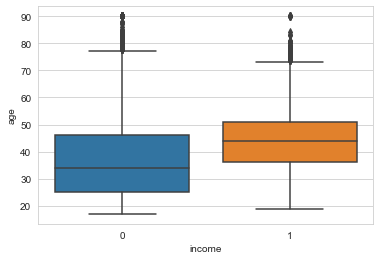

In [32]:
ax = sns.boxplot(x="income", y="age", data=data)

<AxesSubplot:xlabel='hours_per_week', ylabel='Count'>

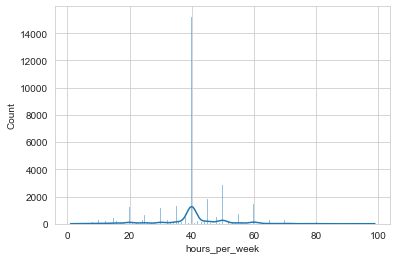

In [33]:
sns.histplot(data=data, x="hours_per_week", kde=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

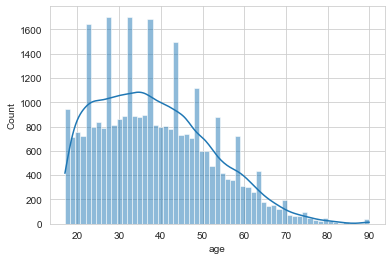

In [34]:
sns.histplot(data=data, x="age", kde=True)

# Getting categorical & numerical values

In [35]:
categorical = data.select_dtypes('object')
numerical =data.select_dtypes('int64')

In [36]:
categorical

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [37]:
numerical = numerical .drop(['income'], axis=1)

y = data['income']

In [38]:
numerical 

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [39]:
#Plotting Numerical

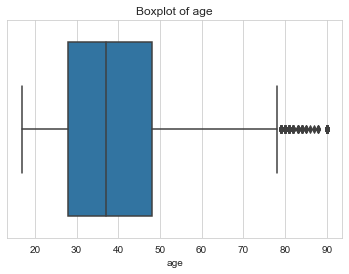

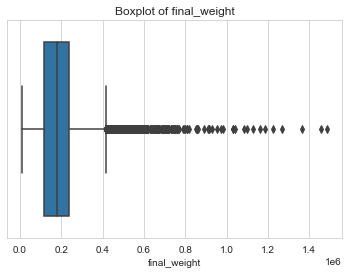

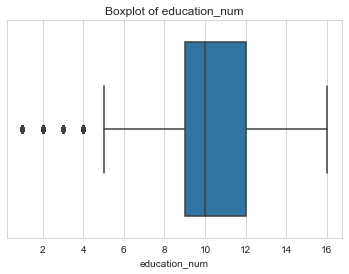

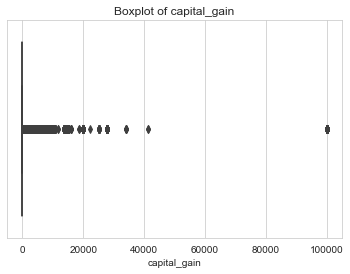

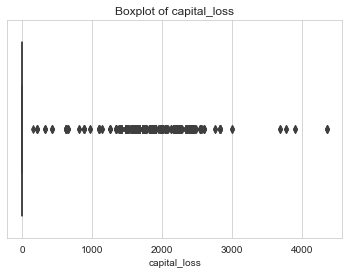

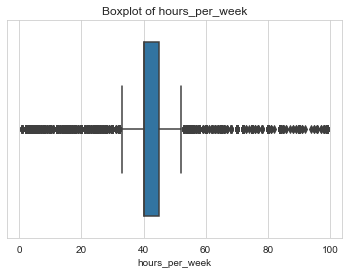

In [40]:
def plot_numerical(df):
    for i in numerical.columns:
        plt.figure()
        plt.title("Boxplot of {}".format(i))
        sns.boxplot(x=i, data=data)
        
plot_numerical(numerical)

In [41]:
#Plotting categorical

In [42]:
def countplot(x):
    for i in x.columns:
        plt.figure(figsize=(15,8))
        sns.countplot(x=i, data=x)
        plt.show()

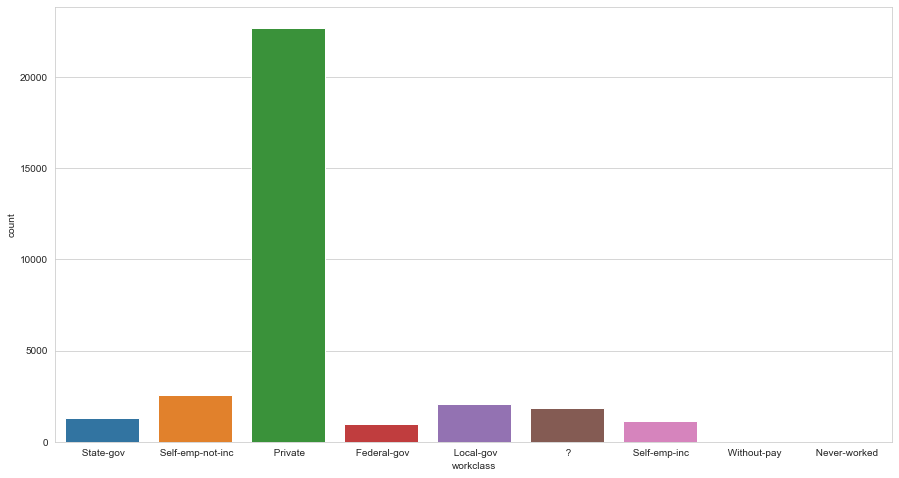

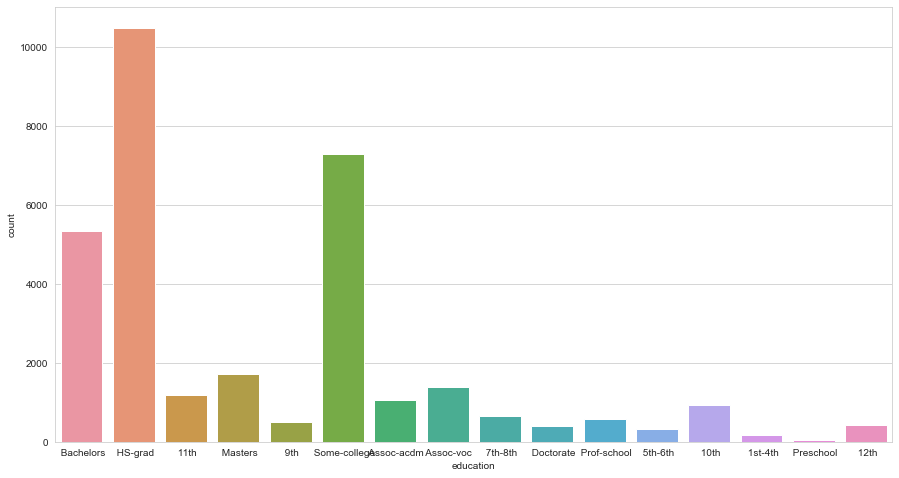

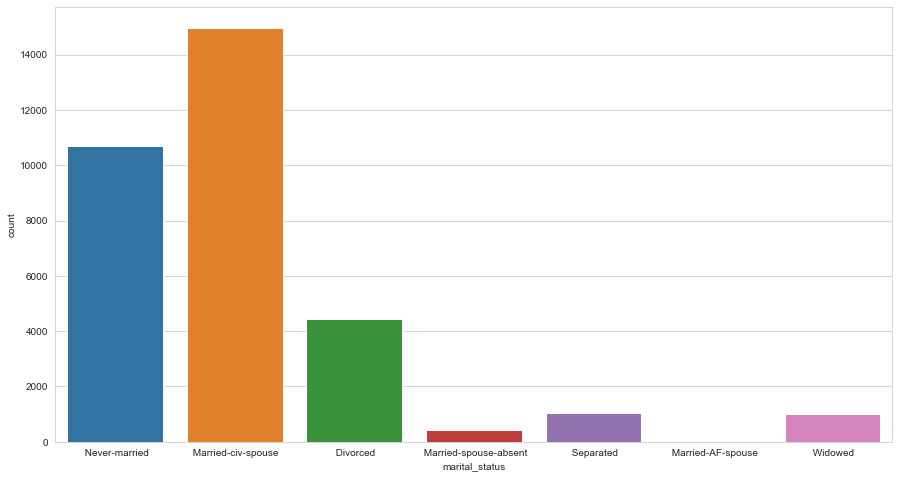

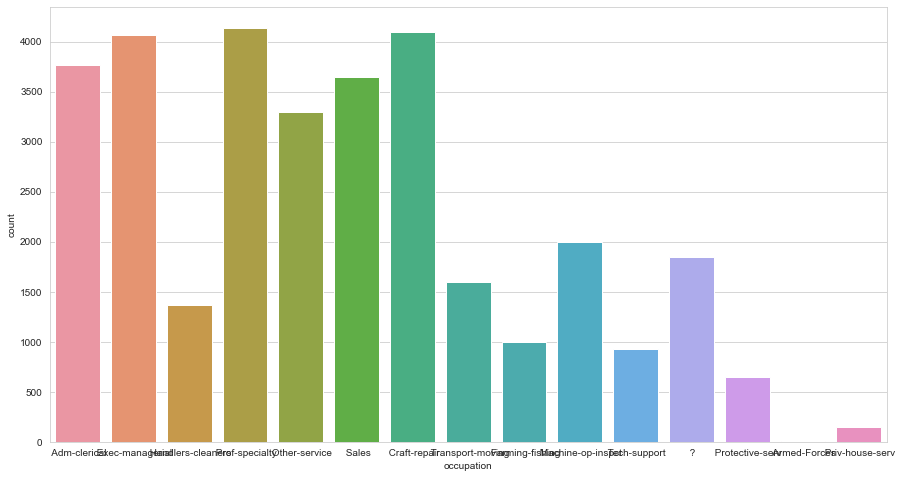

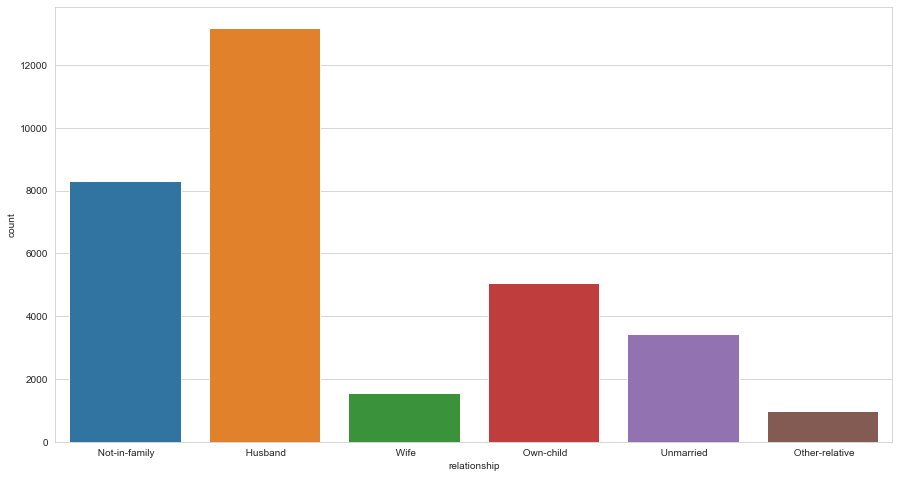

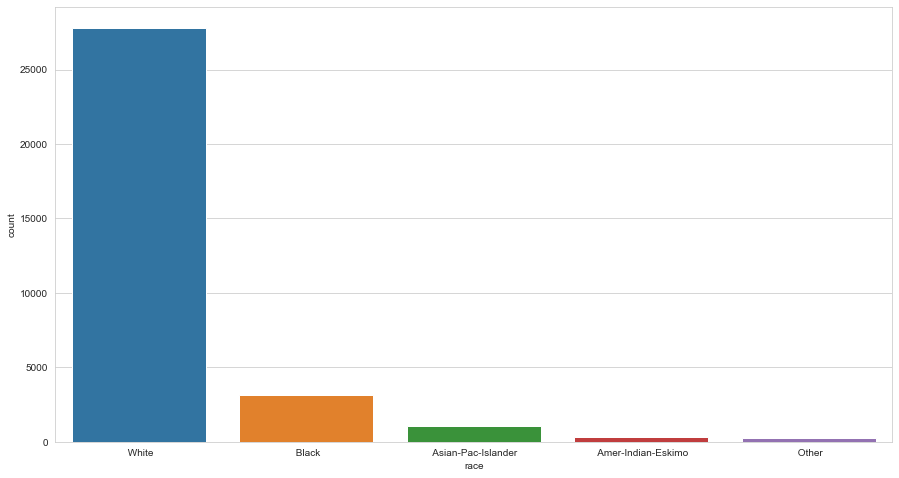

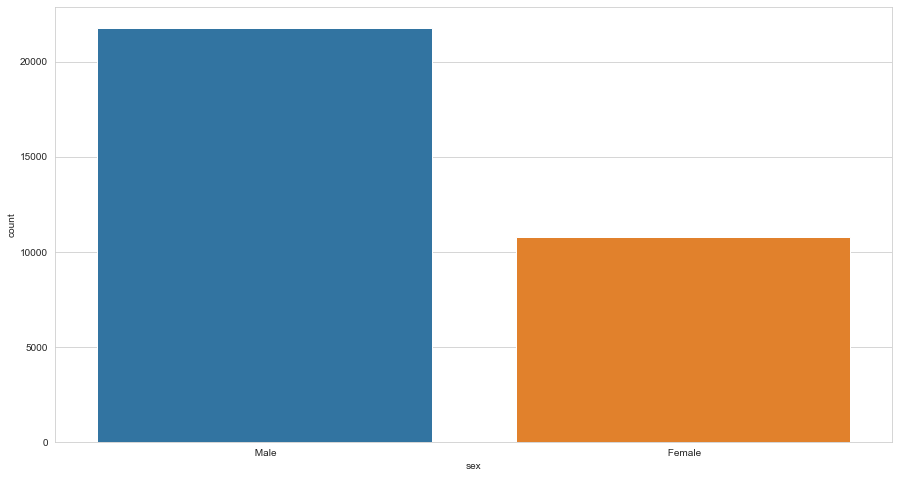

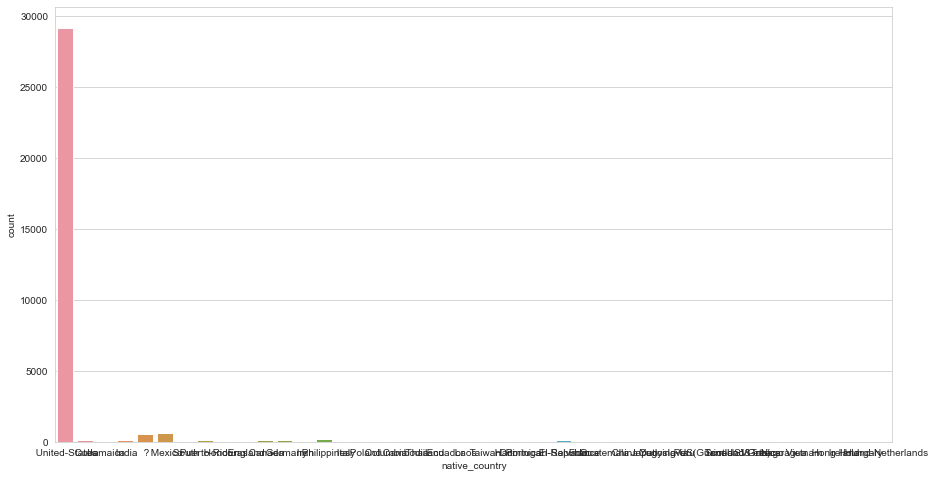

In [43]:
countplot(categorical)

In [44]:
cat_dum = pd.get_dummies(categorical)

In [45]:
cat_dum

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ ?,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0

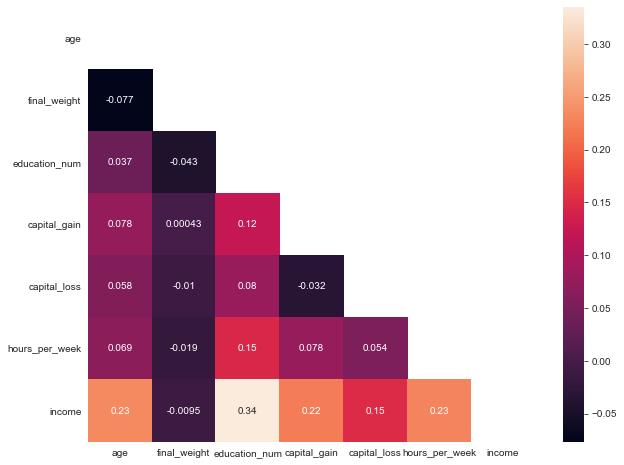

In [46]:
corr_data = data
 
correlations_matrix = corr_data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show() # Half correlation matrix

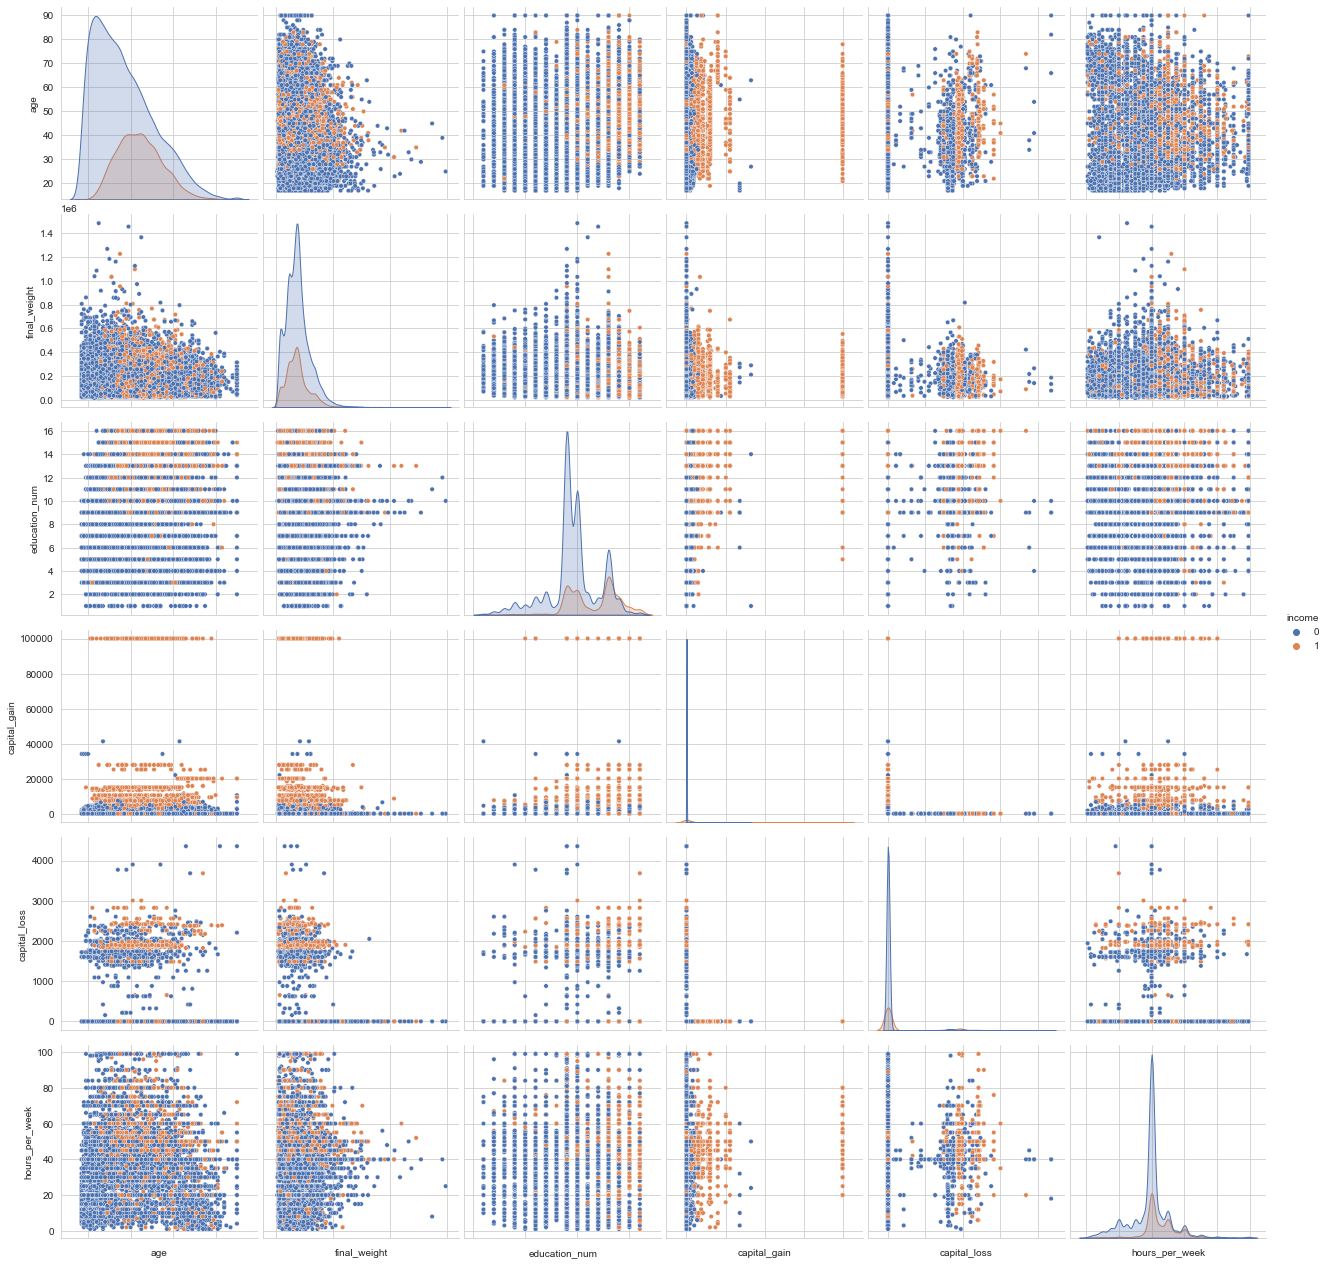

In [47]:
pp = sns.pairplot(data, hue = 'income', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

In [48]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import math

# Model 1 (raw data)

In [49]:
df1 = pd.concat([cat_dum, numerical], axis=1)

In [50]:
df1

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ ?,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,39,77516,13,2174,0,40
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,50,83311,13,0,0,13
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,38,215646,9,0,0,40
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,53,234721,7,0,0,40
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,338409,13,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [51]:
#Top 6 Classification Algorithms in Machine Learning

#Naive Bayes Classifier.
#Support Vector Machine
#Logistic Regression.
#K-Nearest Neighbors.
#AdaBoost
#Random Forest.


#Metrics

#Accuracy Score 
#cohen_kappa_score
#Confusion Matrix

The accuracy of the Gausian Naive Bayes Classifier is 0.8
The Kappa Score of Naive Bayes Classifier is: 0.33
The confusion matrix of Naive Bayes Classifier:


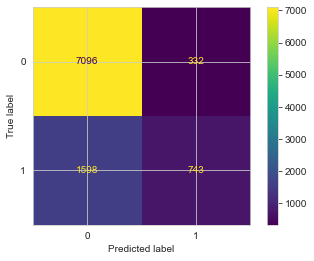

The accuracy of the Support Vector Machine Classifier is 0.78
The Kappa Score of Support Vector Machine Classifier is: 0.13
The confusion matrix of Suppport Vector Machine Classifier:


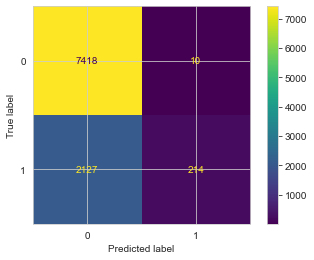

The accuracy of Logistic Regression is 0.8
The Kappa Score of Logistic Regression is: 0.31
The confusion matrix of Logistic Regression:


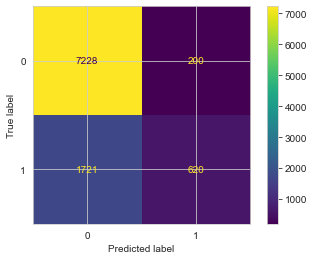

The accuracy of the KNN Model is 0.78
The Kappa Score of KNN Model is: 0.29
The confusion matrix of KNN Model:


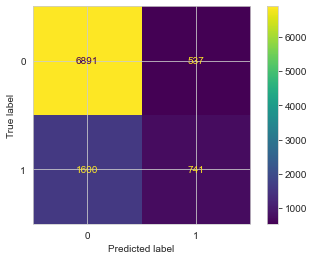

The accuracy of the AdaBoost Model is 0.86
The Kappa Score of the AdaBoost Model is: 0.60
The confusion matrix of the AdaBoost Model:


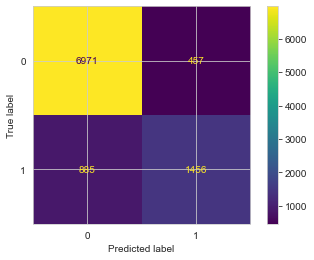

The accuracy of the Random Forest Model is 0.85
The Kappa Score of the Random Forest Model is: 0.58
The confusion matrix of the Random Forest Model:


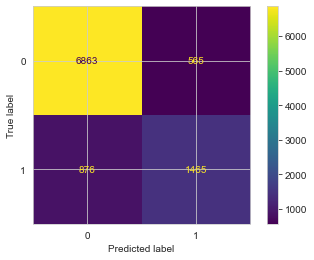

In [52]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df1, y, test_size = 0.3, random_state = 100)

#1. Naive Bayes Classifier.

gnb = GaussianNB()    
gnb_model1=gnb.fit(X_train1, y_train1)
gnb_pred1=gnb_model1.predict(X_test1)
gnb_score1 = round(gnb.score(X_test1,y_test1), 2)
gnb1_kappa = round(cohen_kappa_score(y_test1, gnb_pred1), 2)

print('The accuracy of the Gausian Naive Bayes Classifier is', gnb_score1)
print("The Kappa Score of Naive Bayes Classifier is: %4.2f" % (cohen_kappa_score(y_test1, gnb_pred1)))
print('The confusion matrix of Naive Bayes Classifier:')
plot_confusion_matrix(gnb_model1, X_test1, y_test1)
plt.show()

#2. Support Vector Machine

classifier= svm.LinearSVC(random_state = 100)
svc_model1=classifier.fit(X_train1, y_train1)
svc_pred1 = svc_model1.predict(X_test1)
svc_score1 = round(classifier.score(X_test1,y_test1), 2)
svc1_kappa= round(cohen_kappa_score(y_test1, svc_pred1), 2)

print('The accuracy of the Support Vector Machine Classifier is', svc_score1)
print("The Kappa Score of Support Vector Machine Classifier is: %4.2f" % (cohen_kappa_score(y_test1, svc_pred1)))
print('The confusion matrix of Suppport Vector Machine Classifier:')
plot_confusion_matrix(svc_model1, X_test1, y_test1)
plt.show()

#3. Logistic Regression

logreg = LogisticRegression()
logreg_model1=logreg.fit(X_train1, y_train1)
logreg_pred1=logreg_model1.predict(X_test1)
score_logreg1 = round(logreg.score(X_test1,y_test1), 2)
logreg1_kappa= round(cohen_kappa_score(y_test1, logreg_pred1), 2)

print('The accuracy of Logistic Regression is', score_logreg1)
print("The Kappa Score of Logistic Regression is: %4.2f" % (cohen_kappa_score(y_test1, logreg_pred1)))
print('The confusion matrix of Logistic Regression:')
plot_confusion_matrix(logreg_model1, X_test1, y_test1)
plt.show()

#4. K-Nearest Neighbors

knn = KNeighborsClassifier()
knn_model1=knn.fit(X_train1, y_train1)
knn_pred1=knn_model1.predict(X_test1)
score_knn1 = round(knn.score(X_test1,y_test1), 2)
knn1_kappa= round(cohen_kappa_score(y_test1, knn_pred1), 2)

print('The accuracy of the KNN Model is',score_knn1)
print("The Kappa Score of KNN Model is: %4.2f" % (cohen_kappa_score(y_test1, knn_pred1)))
print('The confusion matrix of KNN Model:')
plot_confusion_matrix(knn_model1, X_test1, y_test1)
plt.show()

#5. AdaBoost

adac = AdaBoostClassifier()
adac_model1=adac.fit(X_train1, y_train1)
adac_pred1= adac_model1.predict(X_test1)
adac_score1 =round(adac.score(X_test1,y_test1),2)
adac1_kappa= round(cohen_kappa_score(y_test1, adac_pred1), 2)

print('The accuracy of the AdaBoost Model is',adac_score1)
print("The Kappa Score of the AdaBoost Model is: %4.2f" % (cohen_kappa_score(y_test1, adac_pred1)))
print('The confusion matrix of the AdaBoost Model:')
plot_confusion_matrix(adac_model1, X_test1, y_test1)
plt.show()

#6. Random forest

rfc = RandomForestClassifier()
rfc_model1=rfc.fit(X_train1, y_train1)
rfc_pred1=rfc_model1.predict(X_test1)
rfc_score1 = round(rfc.score(X_test1,y_test1), 2)
rfc1_kappa= round(cohen_kappa_score(y_test1, rfc_pred1), 2)

print('The accuracy of the Random Forest Model is',rfc_score1)
print("The Kappa Score of the Random Forest Model is: %4.2f" % (cohen_kappa_score(y_test1, rfc_pred1)))
print('The confusion matrix of the Random Forest Model:')
plot_confusion_matrix(rfc_model1, X_test1, y_test1)
plt.show()

# MODEL 2

# LOG TRANSFORMATION High Skewed Columns1- 'capital_gain'

In [53]:
#checking for high-skewed data

In [54]:
from scipy.stats import skew

def skewness(data):  
    columns = list(data.columns)
    high_skew = []
    for c in columns:
        skew = data[c].skew() 
        if skew > 2:
            high_skew.append(c)
    print('High skew columns: ', high_skew)
    return high_skew

In [55]:
skewness(numerical)

High skew columns:  ['capital_gain', 'capital_loss']


['capital_gain', 'capital_loss']

In [56]:
numerical1=numerical.copy()

In [57]:
numerical2=numerical.copy()

In [58]:
#income {' <=50K':0, ' >50K' :1}

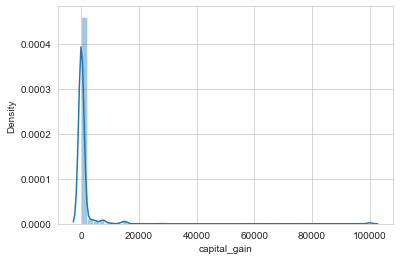

In [59]:
sns.distplot(numerical1['capital_gain']);
plt.show()

In [60]:
numerical1['capital_gain']=numerical1['capital_gain'].apply(lambda x: np.log(x+1))

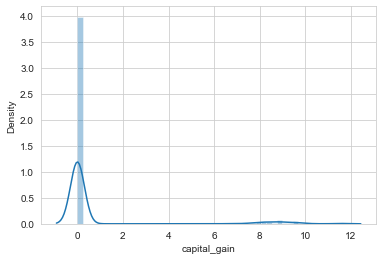

In [61]:
sns.distplot(numerical1['capital_gain']);
plt.show()

In [62]:
numerical1['capital_gain'].isna().sum()

0

In [63]:
df2 = pd.concat([cat_dum, numerical1], axis=1)

In [64]:
df2

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ ?,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,39,77516,13,7.684784,0,40
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,50,83311,13,0.000000,0,13
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,38,215646,9,0.000000,0,40
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,53,234721,7,0.000000,0,40
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,338409,13,0.000000,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

The accuracy of the Gausian Naive Bayes Classifier is 0.8
The Kappa Score of Naive Bayes Classifier is: 0.30
The confusion matrix of Naive Bayes Classifier:


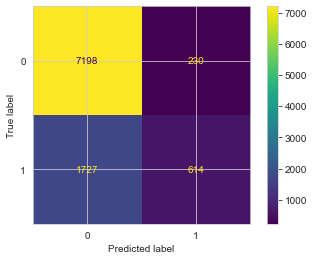

The accuracy of the Support Vector Machine Classifier is 0.76
The Kappa Score of Support Vector Machine Classifier is: 0.00
The confusion matrix of Suppport Vector Machine Classifier:


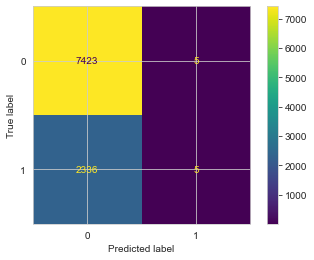

The accuracy of Logistic Regression is 0.77
The Kappa Score of Logistic Regression is: 0.15
The confusion matrix of Logistic Regression:


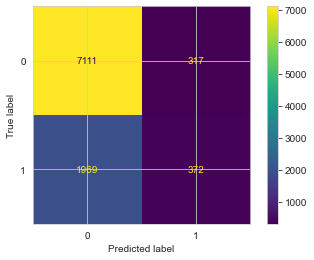

The accuracy of the KNN Model is 0.73
The Kappa Score of KNN Model is: 0.13
The confusion matrix of KNN Model:


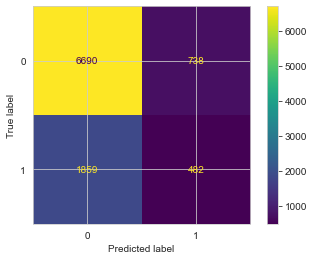

The accuracy of the AdaBoost Model is 0.86
The Kappa Score of the AdaBoost Model is: 0.60
The confusion matrix of the AdaBoost Model:


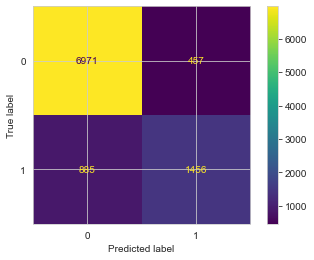

The accuracy of the Random Forest Model is 0.85
The Kappa Score of the Random Forest Model is: 0.58
The confusion matrix of the Random Forest Model:


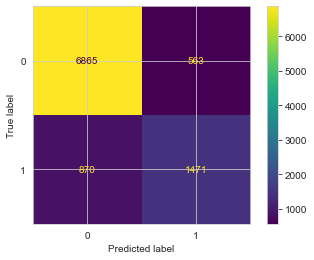

In [65]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2, y, test_size = 0.3, random_state = 100)

#1. Naive Bayes Classifier.

gnb = GaussianNB()    
gnb_model2=gnb.fit(X_train2, y_train2)
gnb_pred2=gnb_model2.predict(X_test2)
gnb_score2 = round(gnb.score(X_test2,y_test2), 2)

print('The accuracy of the Gausian Naive Bayes Classifier is', gnb_score2)

print("The Kappa Score of Naive Bayes Classifier is: %4.2f" % (cohen_kappa_score(y_test2, gnb_pred2)))

print('The confusion matrix of Naive Bayes Classifier:')
plot_confusion_matrix(gnb_model2, X_test2, y_test2)
plt.show()

#2. Support Vector Machine

classifier= svm.LinearSVC(random_state = 100)
svc_model2=classifier.fit(X_train2, y_train2)
svc_pred2 = svc_model2.predict(X_test2)
svc_score2 = round(classifier.score(X_test2,y_test2), 2)

print('The accuracy of the Support Vector Machine Classifier is', svc_score2)

print("The Kappa Score of Support Vector Machine Classifier is: %4.2f" % (cohen_kappa_score(y_test2, svc_pred2)))

print('The confusion matrix of Suppport Vector Machine Classifier:')
plot_confusion_matrix(svc_model2, X_test2, y_test2)
plt.show()

#3. Logistic Regression

logreg = LogisticRegression()
logreg_model2=logreg.fit(X_train2, y_train2)
logreg_pred2=logreg_model2.predict(X_test2)
score_logreg2 = round(logreg.score(X_test2,y_test2), 2)

print('The accuracy of Logistic Regression is', score_logreg2)

print("The Kappa Score of Logistic Regression is: %4.2f" % (cohen_kappa_score(y_test2, logreg_pred2)))

print('The confusion matrix of Logistic Regression:')
plot_confusion_matrix(logreg_model2, X_test2, y_test2)
plt.show()

#4. K-Nearest Neighbors

knn = KNeighborsClassifier()
knn_model2=knn.fit(X_train2, y_train2)
knn_pred2=knn_model2.predict(X_test2)
score_knn2 = round(knn.score(X_test2,y_test2), 2)
print('The accuracy of the KNN Model is',score_knn2)

print("The Kappa Score of KNN Model is: %4.2f" % (cohen_kappa_score(y_test2, knn_pred2)))

print('The confusion matrix of KNN Model:')
plot_confusion_matrix(knn_model2, X_test2, y_test2)
plt.show()

#5. AdaBoost

adac = AdaBoostClassifier()
adac_model2=adac.fit(X_train2, y_train2)
adac_pred2= adac_model2.predict(X_test2)
adac_score2 =round(adac.score(X_test2,y_test2),2)
print('The accuracy of the AdaBoost Model is',adac_score2)
print("The Kappa Score of the AdaBoost Model is: %4.2f" % (cohen_kappa_score(y_test2, adac_pred2)))

print('The confusion matrix of the AdaBoost Model:')
plot_confusion_matrix(adac_model2, X_test2, y_test2)
plt.show()

#6. Random forest

rfc = RandomForestClassifier()
rfc_model2=rfc.fit(X_train2, y_train2)
rfc_pred2=rfc_model2.predict(X_test2)
rfc_score2 = round(rfc.score(X_test2,y_test2), 2)
print('The accuracy of the Random Forest Model is',rfc_score2)
print("The Kappa Score of the Random Forest Model is: %4.2f" % (cohen_kappa_score(y_test2, rfc_pred2)))

print('The confusion matrix of the Random Forest Model:')
plot_confusion_matrix(rfc_model2, X_test2, y_test2)
plt.show()

gnb2_kappa = round(cohen_kappa_score(y_test2, gnb_pred2), 2)
svc2_kappa= round(cohen_kappa_score(y_test2, svc_pred2), 2)
logreg2_kappa= round(cohen_kappa_score(y_test2, logreg_pred2), 2)
knn2_kappa= round(cohen_kappa_score(y_test2, knn_pred2), 2)
adac2_kappa= round(cohen_kappa_score(y_test2, adac_pred2), 2)
rfc2_kappa= round(cohen_kappa_score(y_test2, rfc_pred2), 2)


# Model 3

# LOG TRANSFORMATION High Skewed Columns1- 'capital_loss'

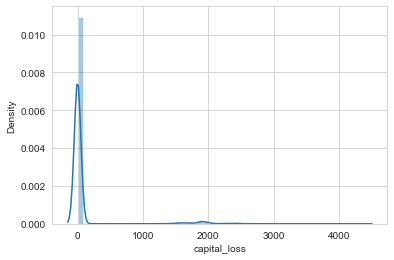

In [66]:
sns.distplot(numerical2['capital_loss']);
plt.show()

In [67]:
numerical2['capital_loss']=numerical2['capital_loss'].apply(lambda x: np.log(x+1))

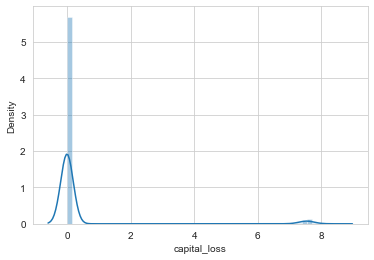

In [68]:
sns.distplot(numerical2['capital_loss']);
plt.show()

In [69]:
numerical2['capital_loss'].isna().sum()

0

In [70]:
df3 = pd.concat([cat_dum, numerical2], axis=1)

In [71]:
df3

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ ?,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,39,77516,13,2174,0.0,40
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,50,83311,13,0,0.0,13
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,38,215646,9,0,0.0,40
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,53,234721,7,0,0.0,40
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,338409,13,0,0.0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

The accuracy of the Gausian Naive Bayes Classifier is 0.8
The Kappa Score of Naive Bayes Classifier is: 0.26
The confusion matrix of Naive Bayes Classifier:


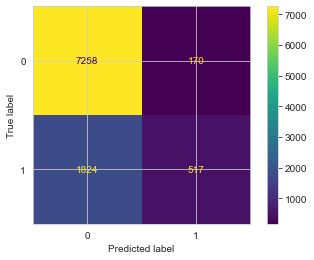

The accuracy of the Support Vector Machine Classifier is 0.77
The Kappa Score of Support Vector Machine Classifier is: 0.06
The confusion matrix of Suppport Vector Machine Classifier:


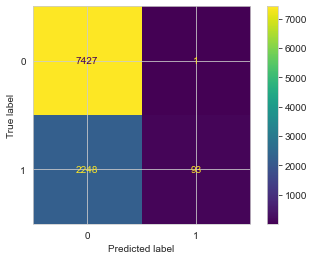

The accuracy of Logistic Regression is 0.8
The Kappa Score of Logistic Regression is: 0.25
The confusion matrix of Logistic Regression:


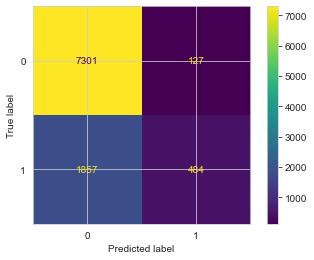

The accuracy of the KNN Model is 0.78
The Kappa Score of KNN Model is: 0.26
The confusion matrix of KNN Model:


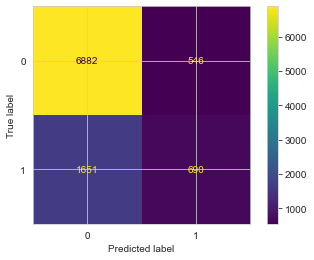

The accuracy of the AdaBoost Model is 0.86
The Kappa Score of the AdaBoost Model is: 0.60
The confusion matrix of the AdaBoost Model:


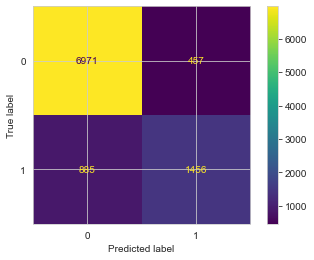

The accuracy of the Random Forest Model is 0.86
The Kappa Score of the Random Forest Model is: 0.58
The confusion matrix of the Random Forest Model:


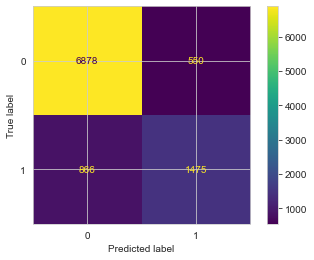

In [72]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df3, y, test_size = 0.3, random_state = 100)

#1. Naive Bayes Classifier.

gnb = GaussianNB()    
gnb_model3=gnb.fit(X_train3, y_train3)
gnb_pred3=gnb_model3.predict(X_test3)
gnb_score3 = round(gnb.score(X_test3,y_test3), 2)

print('The accuracy of the Gausian Naive Bayes Classifier is', gnb_score3)

print("The Kappa Score of Naive Bayes Classifier is: %4.2f" % (cohen_kappa_score(y_test3, gnb_pred3)))

print('The confusion matrix of Naive Bayes Classifier:')
plot_confusion_matrix(gnb_model3, X_test3, y_test3)
plt.show()

#2. Support Vector Machine

classifier= svm.LinearSVC(random_state = 100)
svc_model3=classifier.fit(X_train3, y_train3)
svc_pred3 = svc_model3.predict(X_test3)
svc_score3 = round(classifier.score(X_test3,y_test3), 2)

print('The accuracy of the Support Vector Machine Classifier is', svc_score3)

print("The Kappa Score of Support Vector Machine Classifier is: %4.2f" % (cohen_kappa_score(y_test3, svc_pred3)))

print('The confusion matrix of Suppport Vector Machine Classifier:')
plot_confusion_matrix(svc_model3, X_test3, y_test3)
plt.show()

#3. Logistic Regression

logreg = LogisticRegression()
logreg_model3=logreg.fit(X_train3, y_train3)
logreg_pred3=logreg_model3.predict(X_test3)
score_logreg3 = round(logreg.score(X_test3,y_test3), 2)

print('The accuracy of Logistic Regression is', score_logreg3)

print("The Kappa Score of Logistic Regression is: %4.2f" % (cohen_kappa_score(y_test3, logreg_pred3)))

print('The confusion matrix of Logistic Regression:')
plot_confusion_matrix(logreg_model3, X_test3, y_test3)
plt.show()

#4. K-Nearest Neighbors

knn = KNeighborsClassifier()
knn_model3=knn.fit(X_train3, y_train3)
knn_pred3=knn_model3.predict(X_test3)
score_knn3 = round(knn.score(X_test3,y_test3), 2)
print('The accuracy of the KNN Model is',score_knn3)

print("The Kappa Score of KNN Model is: %4.2f" % (cohen_kappa_score(y_test3, knn_pred3)))

print('The confusion matrix of KNN Model:')
plot_confusion_matrix(knn_model3, X_test3, y_test3)
plt.show()

#5. AdaBoost

adac = AdaBoostClassifier()
adac_model3=adac.fit(X_train3, y_train3)
adac_pred3= adac_model3.predict(X_test3)
adac_score3 =round(adac.score(X_test3,y_test3),2)
print('The accuracy of the AdaBoost Model is',adac_score3)
print("The Kappa Score of the AdaBoost Model is: %4.2f" % (cohen_kappa_score(y_test3, adac_pred3)))

print('The confusion matrix of the AdaBoost Model:')
plot_confusion_matrix(adac_model3, X_test3, y_test3)
plt.show()

#6. Random forest

rfc = RandomForestClassifier()
rfc_model3=rfc.fit(X_train3, y_train3)
rfc_pred3=rfc_model3.predict(X_test3)
rfc_score3 = round(rfc.score(X_test3,y_test3), 2)
print('The accuracy of the Random Forest Model is',rfc_score3)
print("The Kappa Score of the Random Forest Model is: %4.2f" % (cohen_kappa_score(y_test3, rfc_pred3)))

print('The confusion matrix of the Random Forest Model:')
plot_confusion_matrix(rfc_model3, X_test3, y_test3)
plt.show()



gnb3_kappa = round(cohen_kappa_score(y_test3, gnb_pred3), 2)
svc3_kappa= round(cohen_kappa_score(y_test3, svc_pred3), 2)
logreg3_kappa= round(cohen_kappa_score(y_test3, logreg_pred3), 2)
knn3_kappa= round(cohen_kappa_score(y_test3, knn_pred3), 2)
adac3_kappa= round(cohen_kappa_score(y_test3, adac_pred3), 2)
rfc3_kappa= round(cohen_kappa_score(y_test3, rfc_pred3), 2)


# MODEL 4 - Scaling the data

In [73]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(numerical)
x_standardized=pd.DataFrame(transformer.transform(numerical),columns = numerical.columns)

In [74]:
df4 = pd.concat([cat_dum, x_standardized], axis=1)

In [75]:
df4

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ ?,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

The accuracy of the Gausian Naive Bayes Classifier is 0.52
The Kappa Score of Naive Bayes Classifier is: 0.20
The confusion matrix of Naive Bayes Classifier:


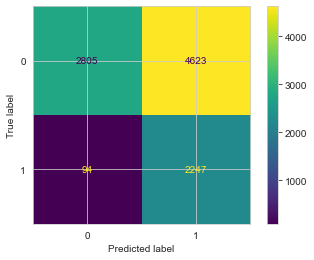

The accuracy of the Support Vector Machine Classifier is 0.85
The Kappa Score of Support Vector Machine Classifier is: 0.57
The confusion matrix of Suppport Vector Machine Classifier:


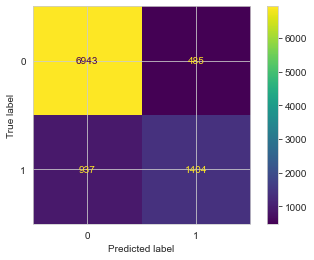

The accuracy of Logistic Regression is 0.85
The Kappa Score of Logistic Regression is: 0.57
The confusion matrix of Logistic Regression:


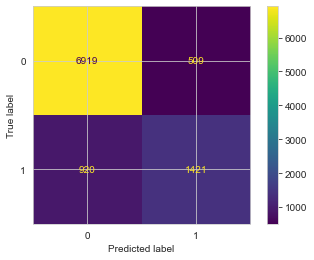

The accuracy of the KNN Model is 0.83
The Kappa Score of KNN Model is: 0.53
The confusion matrix of KNN Model:


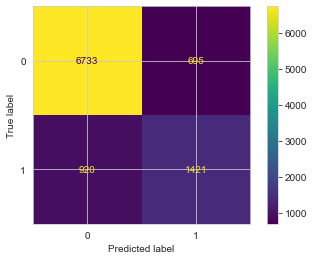

The accuracy of the AdaBoost Model is 0.86
The Kappa Score of the AdaBoost Model is: 0.60
The confusion matrix of the AdaBoost Model:


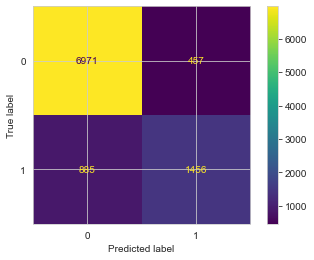

The accuracy of the Random Forest Model is 0.85
The Kappa Score of the Random Forest Model is: 0.58
The confusion matrix of the Random Forest Model:


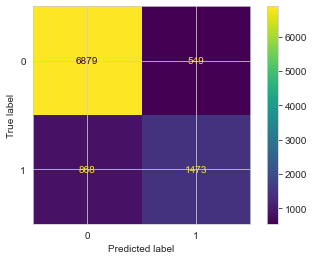

In [76]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(df4, y, test_size = 0.3, random_state = 100)

#1. Naive Bayes Classifier.

gnb = GaussianNB()    
gnb_model4=gnb.fit(X_train4, y_train4)
gnb_pred4=gnb_model4.predict(X_test4)
gnb_score4 = round(gnb.score(X_test4,y_test4), 2)

print('The accuracy of the Gausian Naive Bayes Classifier is', gnb_score4)

print("The Kappa Score of Naive Bayes Classifier is: %4.2f" % (cohen_kappa_score(y_test4, gnb_pred4)))

print('The confusion matrix of Naive Bayes Classifier:')
plot_confusion_matrix(gnb_model4, X_test4, y_test4)
plt.show()

#2. Support Vector Machine

classifier= svm.LinearSVC(random_state = 100)
svc_model4=classifier.fit(X_train4, y_train4)
svc_pred4 = svc_model4.predict(X_test4)
svc_score4 = round(classifier.score(X_test4,y_test4), 2)

print('The accuracy of the Support Vector Machine Classifier is', svc_score4)

print("The Kappa Score of Support Vector Machine Classifier is: %4.2f" % (cohen_kappa_score(y_test4, svc_pred4)))

print('The confusion matrix of Suppport Vector Machine Classifier:')
plot_confusion_matrix(svc_model4, X_test4, y_test4)
plt.show()

#3. Logistic Regression

logreg = LogisticRegression()
logreg_model4=logreg.fit(X_train4, y_train4)
logreg_pred4=logreg_model4.predict(X_test4)
score_logreg4 = round(logreg.score(X_test4,y_test4), 2)

print('The accuracy of Logistic Regression is', score_logreg4)

print("The Kappa Score of Logistic Regression is: %4.2f" % (cohen_kappa_score(y_test4, logreg_pred4)))

print('The confusion matrix of Logistic Regression:')
plot_confusion_matrix(logreg_model4, X_test4, y_test4)
plt.show()

#4. K-Nearest Neighbors

knn = KNeighborsClassifier()
knn_model4=knn.fit(X_train4, y_train4)
knn_pred4=knn_model4.predict(X_test4)
score_knn4 = round(knn.score(X_test4,y_test4), 2)
print('The accuracy of the KNN Model is',score_knn4)

print("The Kappa Score of KNN Model is: %4.2f" % (cohen_kappa_score(y_test4, knn_pred4)))

print('The confusion matrix of KNN Model:')
plot_confusion_matrix(knn_model4, X_test4, y_test4)
plt.show()

#5. AdaBoost

adac = AdaBoostClassifier()
adac_model4=adac.fit(X_train4, y_train4)
adac_pred4= adac_model4.predict(X_test4)
adac_score4 =round(adac.score(X_test4,y_test4),2)
print('The accuracy of the AdaBoost Model is',adac_score4)
print("The Kappa Score of the AdaBoost Model is: %4.2f" % (cohen_kappa_score(y_test4, adac_pred4)))

print('The confusion matrix of the AdaBoost Model:')
plot_confusion_matrix(adac_model4, X_test4, y_test4)
plt.show()

#6. Random forest

rfc = RandomForestClassifier()
rfc_model4=rfc.fit(X_train4, y_train4)
rfc_pred4=rfc_model4.predict(X_test4)
rfc_score4 = round(rfc.score(X_test4,y_test4), 2)
print('The accuracy of the Random Forest Model is',rfc_score4)
print("The Kappa Score of the Random Forest Model is: %4.2f" % (cohen_kappa_score(y_test4, rfc_pred4)))

print('The confusion matrix of the Random Forest Model:')
plot_confusion_matrix(rfc_model4, X_test4, y_test4)
plt.show()

gnb4_kappa = round(cohen_kappa_score(y_test4, gnb_pred4), 2)
svc4_kappa= round(cohen_kappa_score(y_test4, svc_pred4), 2)
logreg4_kappa= round(cohen_kappa_score(y_test4, logreg_pred4), 2)
knn4_kappa= round(cohen_kappa_score(y_test4, knn_pred4), 2)
adac4_kappa= round(cohen_kappa_score(y_test4, adac_pred4), 2)
rfc4_kappa= round(cohen_kappa_score(y_test4, rfc_pred4), 2)

# MODEL 5 -  dealing with '?'

In [77]:
df5 = data.copy()

In [78]:
from numpy import nan

In [79]:
df5

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [80]:
df5['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [81]:
df5['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [82]:
df5['native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [83]:
df5=df5.replace(" ?", nan)

In [84]:
df5.isna().sum()

age                  0
workclass         1836
final_weight         0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [85]:
df5['workclass'].fillna(df5['workclass'].mode()[0], inplace=True)

In [86]:
df5['occupation'].fillna(df5['occupation'].mode()[0], inplace=True)

In [87]:
df5['native_country'].fillna(df5['native_country'].mode()[0], inplace=True)

In [88]:
df5.isna().sum()

age               0
workclass         0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [89]:
df5

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [90]:
categorical5 = df5.select_dtypes('object')
numerical5 =df5.select_dtypes('int64')

In [91]:
categorical5

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [92]:
categorical5

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [93]:
numerical5 = numerical5.drop(['income'], axis=1)

y5 = df5['income']

In [94]:
cat_dum5 = pd.get_dummies(categorical5)


In [95]:
df5a = pd.concat([cat_dum5, numerical5], axis=1)

In [96]:
df5a

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,39,77516,13,2174,0,40
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,50,83311,13,0,0,13
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,38,215646,9,0,0,40
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,53,234721,7,0,0,40
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,338409,13,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0

The accuracy of the Gausian Naive Bayes Classifier is 0.8
The Kappa Score of Naive Bayes Classifier is: 0.33
The confusion matrix of Naive Bayes Classifier:


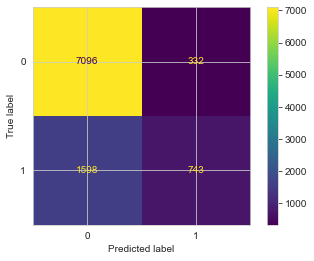

The accuracy of the Support Vector Machine Classifier is 0.78
The Kappa Score of Support Vector Machine Classifier is: 0.13
The confusion matrix of Suppport Vector Machine Classifier:


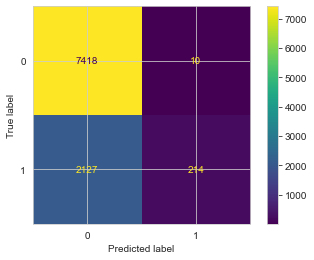

The accuracy of Logistic Regression is 0.8
The Kappa Score of Logistic Regression is: 0.31
The confusion matrix of Logistic Regression:


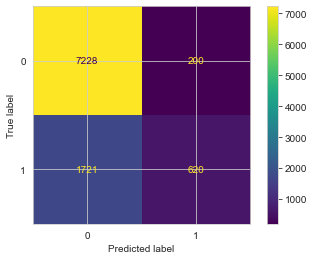

The accuracy of the KNN Model is 0.78
The Kappa Score of KNN Model is: 0.29
The confusion matrix of KNN Model:


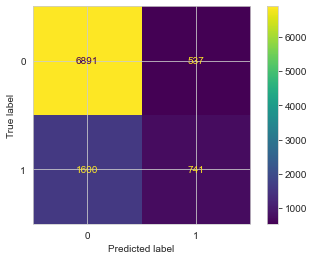

The accuracy of the AdaBoost Model is 0.86
The Kappa Score of the AdaBoost Model is: 0.59
The confusion matrix of the AdaBoost Model:


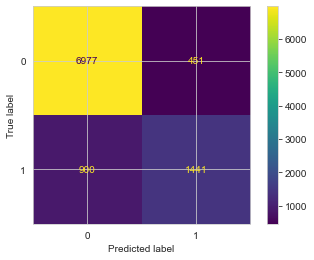

The accuracy of the Random Forest Model is 0.85
The Kappa Score of the Random Forest Model is: 0.58
The confusion matrix of the Random Forest Model:


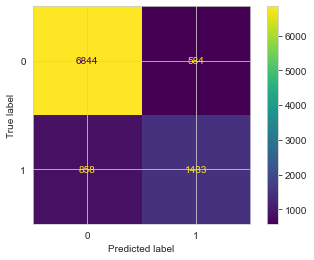

In [97]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(df5a, y5, test_size = 0.3, random_state = 100)

#1. Naive Bayes Classifier.

gnb = GaussianNB()    
gnb_model5=gnb.fit(X_train5, y_train5)
gnb_pred5=gnb_model5.predict(X_test5)
gnb_score5 = round(gnb.score(X_test5,y_test5), 2)

print('The accuracy of the Gausian Naive Bayes Classifier is', gnb_score5)

print("The Kappa Score of Naive Bayes Classifier is: %4.2f" % (cohen_kappa_score(y_test5, gnb_pred5)))

print('The confusion matrix of Naive Bayes Classifier:')
plot_confusion_matrix(gnb_model5, X_test5, y_test5)
plt.show()

#2. Support Vector Machine

classifier= svm.LinearSVC(random_state = 100)
svc_model5=classifier.fit(X_train5, y_train5)
svc_pred5 = svc_model5.predict(X_test5)
svc_score5 = round(classifier.score(X_test5,y_test5), 2)

print('The accuracy of the Support Vector Machine Classifier is', svc_score5)

print("The Kappa Score of Support Vector Machine Classifier is: %4.2f" % (cohen_kappa_score(y_test5, svc_pred5)))

print('The confusion matrix of Suppport Vector Machine Classifier:')
plot_confusion_matrix(svc_model5, X_test5, y_test5)
plt.show()

#3. Logistic Regression

logreg = LogisticRegression()
logreg_model5=logreg.fit(X_train5, y_train5)
logreg_pred5=logreg_model5.predict(X_test5)
score_logreg5 = round(logreg.score(X_test5,y_test5), 2)

print('The accuracy of Logistic Regression is', score_logreg5)

print("The Kappa Score of Logistic Regression is: %4.2f" % (cohen_kappa_score(y_test5, logreg_pred5)))

print('The confusion matrix of Logistic Regression:')
plot_confusion_matrix(logreg_model5, X_test5, y_test5)
plt.show()

#4. K-Nearest Neighbors

knn = KNeighborsClassifier()
knn_model5=knn.fit(X_train5, y_train5)
knn_pred5=knn_model5.predict(X_test5)
score_knn5 = round(knn.score(X_test5,y_test5), 2)
print('The accuracy of the KNN Model is',score_knn5)

print("The Kappa Score of KNN Model is: %4.2f" % (cohen_kappa_score(y_test5, knn_pred5)))

print('The confusion matrix of KNN Model:')
plot_confusion_matrix(knn_model5, X_test5, y_test5)
plt.show()

#5. AdaBoost

adac = AdaBoostClassifier()
adac_model5=adac.fit(X_train5, y_train5)
adac_pred5= adac_model5.predict(X_test5)
adac_score5 =round(adac.score(X_test5,y_test5),2)
print('The accuracy of the AdaBoost Model is',adac_score5)
print("The Kappa Score of the AdaBoost Model is: %4.2f" % (cohen_kappa_score(y_test5, adac_pred5)))

print('The confusion matrix of the AdaBoost Model:')
plot_confusion_matrix(adac_model5, X_test5, y_test5)
plt.show()

#6. Random forest

rfc = RandomForestClassifier()
rfc_model5=rfc.fit(X_train5, y_train5)
rfc_pred5=rfc_model5.predict(X_test5)
rfc_score5 = round(rfc.score(X_test5,y_test5), 2)
print('The accuracy of the Random Forest Model is',rfc_score5)
print("The Kappa Score of the Random Forest Model is: %4.2f" % (cohen_kappa_score(y_test5, rfc_pred5)))

print('The confusion matrix of the Random Forest Model:')
plot_confusion_matrix(rfc_model5, X_test5, y_test5)
plt.show()

gnb5_kappa = round(cohen_kappa_score(y_test5, gnb_pred3), 2)
svc5_kappa= round(cohen_kappa_score(y_test5, svc_pred5), 2)
logreg5_kappa= round(cohen_kappa_score(y_test5, logreg_pred5), 2)
knn5_kappa= round(cohen_kappa_score(y_test5, knn_pred5), 2)
adac5_kappa= round(cohen_kappa_score(y_test5, adac_pred5), 2)
rfc5_kappa= round(cohen_kappa_score(y_test5, rfc_pred5), 2)

# Model 6 - Transforming education 

In [98]:
df6 = data.copy()

In [99]:
df6

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [100]:
df6['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [101]:
education = {' Bachelors': 'Bachelor', 
             ' HS-grad' : 'Highschool', 
             ' 11th': 'Primary School', 
             ' Masters': 'Master',
             ' 9th' : 'Primary School', 
             ' Some-college' : 'Some-college',
             ' Assoc-acdm' : 'Assoc-acdm',
             ' Assoc-voc' : 'Assoc-voc',
             ' 7th-8th': 'Primary School',
             ' Doctorate' : 'Doctorate',
             ' Prof-school' : 'Prof-school',
             ' 5th-6th': 'Primary School',
             ' 10th': 'Primary School',
             ' 1st-4th': 'Primary School',
             ' Preschool': 'Primary School',
             ' 12th': 'Primary School'}
df6['education']=df6['education'].replace(education)


In [102]:
df6['education'].value_counts()

Highschool        10501
Some-college       7291
Bachelor           5355
Primary School     4253
Master             1723
Assoc-voc          1382
Assoc-acdm         1067
Prof-school         576
Doctorate           413
Name: education, dtype: int64

In [103]:
categorical6 = df6.select_dtypes('object')
numerical6 =df6.select_dtypes('int64')

In [104]:
numerical6 = numerical6.drop(['income'], axis=1)

y6 = df6['income']

In [105]:
cat_dum6 = pd.get_dummies(categorical6)


In [106]:
df6a = pd.concat([cat_dum6, numerical6], axis=1)

In [107]:
df6a 

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_Assoc-acdm,education_Assoc-voc,education_Bachelor,education_Doctorate,education_Highschool,education_Master,education_Primary School,education_Prof-school,education_Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ ?,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,39,77516,13,2174,0,40
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,50,83311,13,0,0,13
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,38,215646,9,0,0,40
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,53,234721,7,0,0,40
4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,338409,13,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

The accuracy of the Gausian Naive Bayes Classifier is 0.8
The Kappa Score of Naive Bayes Classifier is: 0.33
The confusion matrix of Naive Bayes Classifier:


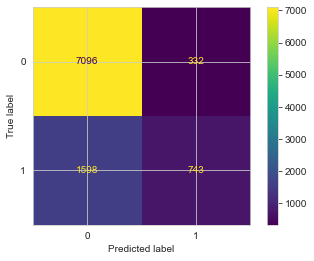

The accuracy of the Support Vector Machine Classifier is 0.78
The Kappa Score of Support Vector Machine Classifier is: 0.13
The confusion matrix of Suppport Vector Machine Classifier:


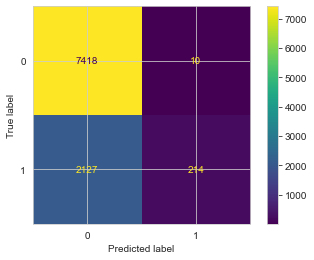

The accuracy of Logistic Regression is 0.8
The Kappa Score of Logistic Regression is: 0.31
The confusion matrix of Logistic Regression:


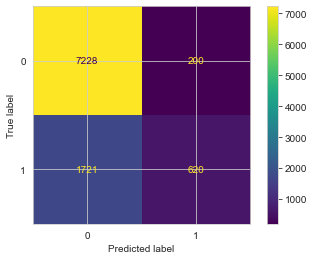

The accuracy of the KNN Model is 0.78
The Kappa Score of KNN Model is: 0.29
The confusion matrix of KNN Model:


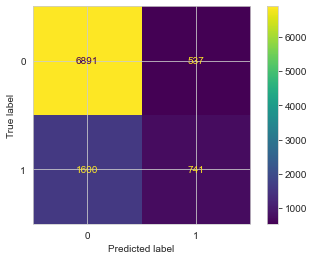

The accuracy of the AdaBoost Model is 0.86
The Kappa Score of the AdaBoost Model is: 0.60
The confusion matrix of the AdaBoost Model:


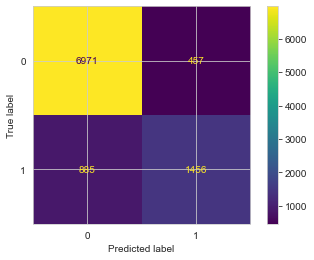

The accuracy of the Random Forest Model is 0.86
The Kappa Score of the Random Forest Model is: 0.59
The confusion matrix of the Random Forest Model:


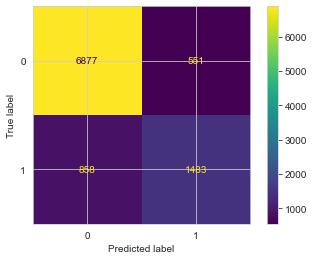

In [108]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(df6a, y6, test_size = 0.3, random_state = 100)

#1. Naive Bayes Classifier.

gnb = GaussianNB()    
gnb_model6=gnb.fit(X_train6, y_train6)
gnb_pred6=gnb_model6.predict(X_test6)
gnb_score6 = round(gnb.score(X_test6,y_test6), 2)

print('The accuracy of the Gausian Naive Bayes Classifier is', gnb_score6)

print("The Kappa Score of Naive Bayes Classifier is: %4.2f" % (cohen_kappa_score(y_test6, gnb_pred6)))

print('The confusion matrix of Naive Bayes Classifier:')
plot_confusion_matrix(gnb_model6, X_test6, y_test6)
plt.show()

#2. Support Vector Machine

classifier= svm.LinearSVC(random_state = 100)
svc_model6=classifier.fit(X_train6, y_train6)
svc_pred6 = svc_model6.predict(X_test6)
svc_score6 = round(classifier.score(X_test6,y_test6), 2)

print('The accuracy of the Support Vector Machine Classifier is', svc_score6)

print("The Kappa Score of Support Vector Machine Classifier is: %4.2f" % (cohen_kappa_score(y_test6, svc_pred6)))

print('The confusion matrix of Suppport Vector Machine Classifier:')
plot_confusion_matrix(svc_model6, X_test6, y_test6)
plt.show()

#3. Logistic Regression

logreg = LogisticRegression()
logreg_model6=logreg.fit(X_train6, y_train6)
logreg_pred6=logreg_model6.predict(X_test6)
score_logreg6 = round(logreg.score(X_test6,y_test6), 2)

print('The accuracy of Logistic Regression is', score_logreg6)

print("The Kappa Score of Logistic Regression is: %4.2f" % (cohen_kappa_score(y_test6, logreg_pred6)))

print('The confusion matrix of Logistic Regression:')
plot_confusion_matrix(logreg_model6, X_test6, y_test6)
plt.show()

#4. K-Nearest Neighbors

knn = KNeighborsClassifier()
knn_model6=knn.fit(X_train6, y_train6)
knn_pred6=knn_model6.predict(X_test6)
score_knn6 = round(knn.score(X_test6,y_test6), 2)
print('The accuracy of the KNN Model is',score_knn6)

print("The Kappa Score of KNN Model is: %4.2f" % (cohen_kappa_score(y_test6, knn_pred6)))

print('The confusion matrix of KNN Model:')
plot_confusion_matrix(knn_model6, X_test6, y_test6)
plt.show()

#5. AdaBoost

adac = AdaBoostClassifier()
adac_model6=adac.fit(X_train6, y_train6)
adac_pred6= adac_model6.predict(X_test6)
adac_score6 =round(adac.score(X_test6,y_test6),2)
print('The accuracy of the AdaBoost Model is',adac_score6)
print("The Kappa Score of the AdaBoost Model is: %4.2f" % (cohen_kappa_score(y_test6, adac_pred6)))

print('The confusion matrix of the AdaBoost Model:')
plot_confusion_matrix(adac_model6, X_test6, y_test6)
plt.show()

#6. Random forest

rfc = RandomForestClassifier()
rfc_model6=rfc.fit(X_train6, y_train6)
rfc_pred6=rfc_model6.predict(X_test6)
rfc_score6 = round(rfc.score(X_test6,y_test6), 2)
print('The accuracy of the Random Forest Model is',rfc_score6)
print("The Kappa Score of the Random Forest Model is: %4.2f" % (cohen_kappa_score(y_test6, rfc_pred6)))

print('The confusion matrix of the Random Forest Model:')
plot_confusion_matrix(rfc_model6, X_test6, y_test6)
plt.show()

gnb6_kappa = round(cohen_kappa_score(y_test6, gnb_pred6), 2)
svc6_kappa= round(cohen_kappa_score(y_test6, svc_pred6), 2)
logreg6_kappa= round(cohen_kappa_score(y_test6, logreg_pred6), 2)
knn6_kappa= round(cohen_kappa_score(y_test6, knn_pred6), 2)
adac6_kappa= round(cohen_kappa_score(y_test6, adac_pred6), 2)
rfc6_kappa= round(cohen_kappa_score(y_test6, rfc_pred6), 2)

# Model 7 Smote

In [109]:
df7 = data.copy()

In [110]:
df7

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [111]:
y7 = df7['income']
df7 = df7.drop(['income'], axis=1)



In [112]:
categorical7 = df7.select_dtypes('object')
numerical7 =df7.select_dtypes('int64')

In [113]:
cat_dum7 = pd.get_dummies(categorical7)

In [114]:
df7a = pd.concat([cat_dum7, numerical7], axis=1)

In [115]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_sm, y_sm = smote.fit_sample(df7a, y7)
pd.DataFrame(y_sm).value_counts()

income
1         24720
0         24720
dtype: int64

In [116]:
X_sm

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ ?,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,39,77516,13,2174,0,40
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,50,83311,13,0,0,13
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,38,215646,9,0,0,40
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,53,234721,7,0,0,40
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,338409,13,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

The accuracy of the Gausian Naive Bayes Classifier is 0.63
The Kappa Score of Naive Bayes Classifier is: 0.26
The confusion matrix of Naive Bayes Classifier:


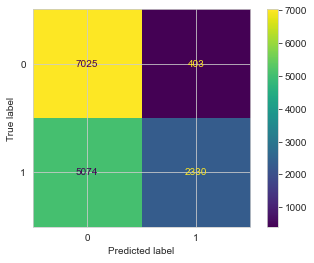

The accuracy of the Support Vector Machine Classifier is 0.5
The Kappa Score of Support Vector Machine Classifier is: 0.00
The confusion matrix of Suppport Vector Machine Classifier:


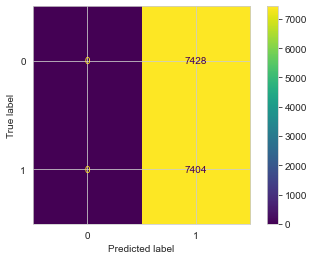

The accuracy of Logistic Regression is 0.62
The Kappa Score of Logistic Regression is: 0.24
The confusion matrix of Logistic Regression:


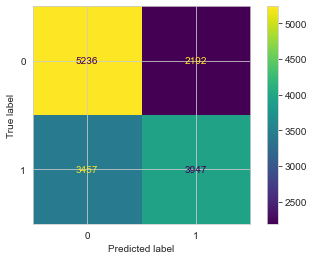

The accuracy of the KNN Model is 0.71
The Kappa Score of KNN Model is: 0.42
The confusion matrix of KNN Model:


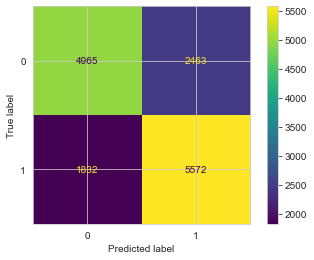

The accuracy of the AdaBoost Model is 0.9
The Kappa Score of the AdaBoost Model is: 0.79
The confusion matrix of the AdaBoost Model:


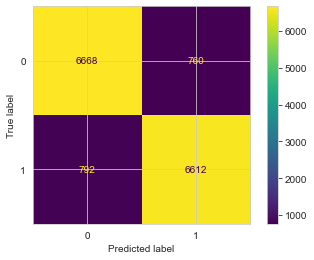

The accuracy of the Random Forest Model is 0.9
The Kappa Score of the Random Forest Model is: 0.80
The confusion matrix of the Random Forest Model:


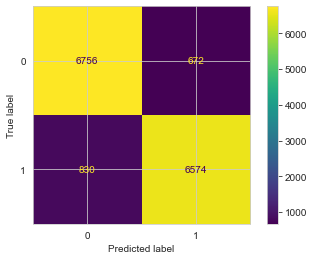

In [117]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 100)

#1. Naive Bayes Classifier.

gnb = GaussianNB()    
gnb_model7=gnb.fit(X_train7, y_train7)
gnb_pred7=gnb_model7.predict(X_test7)
gnb_score7 = round(gnb.score(X_test7,y_test7), 2)

print('The accuracy of the Gausian Naive Bayes Classifier is', gnb_score7)

print("The Kappa Score of Naive Bayes Classifier is: %4.2f" % (cohen_kappa_score(y_test7, gnb_pred7)))

print('The confusion matrix of Naive Bayes Classifier:')
plot_confusion_matrix(gnb_model7, X_test7, y_test7)
plt.show()

#2. Support Vector Machine

classifier= svm.LinearSVC(random_state = 100)
svc_model7=classifier.fit(X_train7, y_train7)
svc_pred7 = svc_model7.predict(X_test7)
svc_score7 = round(classifier.score(X_test7,y_test7), 2)

print('The accuracy of the Support Vector Machine Classifier is', svc_score7)

print("The Kappa Score of Support Vector Machine Classifier is: %4.2f" % (cohen_kappa_score(y_test7, svc_pred7)))

print('The confusion matrix of Suppport Vector Machine Classifier:')
plot_confusion_matrix(svc_model7, X_test7, y_test7)
plt.show()

#3. Logistic Regression

logreg = LogisticRegression()
logreg_model7=logreg.fit(X_train7, y_train7)
logreg_pred7=logreg_model7.predict(X_test7)
score_logreg7 = round(logreg.score(X_test7,y_test7), 2)

print('The accuracy of Logistic Regression is', score_logreg7)

print("The Kappa Score of Logistic Regression is: %4.2f" % (cohen_kappa_score(y_test7, logreg_pred7)))

print('The confusion matrix of Logistic Regression:')
plot_confusion_matrix(logreg_model7, X_test7, y_test7)
plt.show()

#4. K-Nearest Neighbors

knn = KNeighborsClassifier()
knn_model7=knn.fit(X_train7, y_train7)
knn_pred7=knn_model7.predict(X_test7)
score_knn7 = round(knn.score(X_test7,y_test7), 2)
print('The accuracy of the KNN Model is',score_knn7)

print("The Kappa Score of KNN Model is: %4.2f" % (cohen_kappa_score(y_test7, knn_pred7)))

print('The confusion matrix of KNN Model:')
plot_confusion_matrix(knn_model7, X_test7, y_test7)
plt.show()

#5. AdaBoost

adac = AdaBoostClassifier()
adac_model7=adac.fit(X_train7, y_train7)
adac_pred7= adac_model7.predict(X_test7)
adac_score7 =round(adac.score(X_test7,y_test7),2)
print('The accuracy of the AdaBoost Model is',adac_score7)
print("The Kappa Score of the AdaBoost Model is: %4.2f" % (cohen_kappa_score(y_test7, adac_pred7)))

print('The confusion matrix of the AdaBoost Model:')
plot_confusion_matrix(adac_model7, X_test7, y_test7)
plt.show()

#6. Random forest

rfc = RandomForestClassifier()
rfc_model7=rfc.fit(X_train7, y_train7)
rfc_pred7=rfc_model7.predict(X_test7)
rfc_score7 = round(rfc.score(X_test7,y_test7), 2)
print('The accuracy of the Random Forest Model is',rfc_score7)
print("The Kappa Score of the Random Forest Model is: %4.2f" % (cohen_kappa_score(y_test7, rfc_pred7)))

print('The confusion matrix of the Random Forest Model:')
plot_confusion_matrix(rfc_model7, X_test7, y_test7)
plt.show()

gnb7_kappa = round(cohen_kappa_score(y_test7, gnb_pred7), 2)
svc7_kappa= round(cohen_kappa_score(y_test7, svc_pred7), 2)
logreg7_kappa= round(cohen_kappa_score(y_test7, logreg_pred7), 2)
knn7_kappa= round(cohen_kappa_score(y_test7, knn_pred7), 2)
adac7_kappa= round(cohen_kappa_score(y_test7, adac_pred7), 2)
rfc7_kappa= round(cohen_kappa_score(y_test7, rfc_pred7), 2)


# Model 8 Tomek Links

In [118]:
df8 = data.copy()

In [119]:
y8 = df8['income']
df8 = df8.drop(['income'], axis=1)



In [120]:
categorical8 = df8.select_dtypes('object')
numerical8 =df8.select_dtypes('int64')

In [121]:
cat_dum8 = pd.get_dummies(categorical8)

In [122]:
df8a = pd.concat([cat_dum8, numerical8], axis=1)

In [123]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')

X_tl, y_tl = tl.fit_sample(df8a, y8)
pd.DataFrame(y_tl).value_counts()

income
0         22295
1          7841
dtype: int64

The accuracy of the Gausian Naive Bayes Classifier is 0.79
The Kappa Score of Naive Bayes Classifier is: 0.33
The confusion matrix of Naive Bayes Classifier:


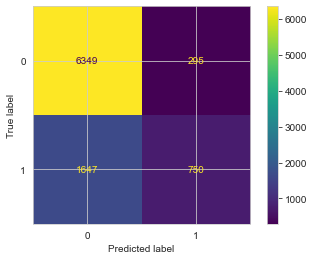

The accuracy of the Support Vector Machine Classifier is 0.76
The Kappa Score of Support Vector Machine Classifier is: 0.17
The confusion matrix of Suppport Vector Machine Classifier:


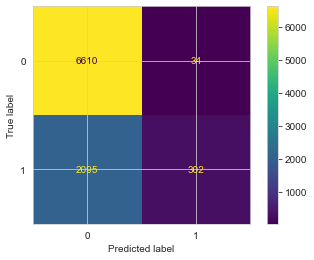

The accuracy of Logistic Regression is 0.78
The Kappa Score of Logistic Regression is: 0.31
The confusion matrix of Logistic Regression:


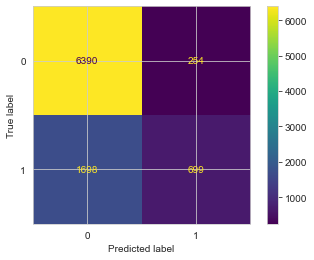

The accuracy of the KNN Model is 0.76
The Kappa Score of KNN Model is: 0.31
The confusion matrix of KNN Model:


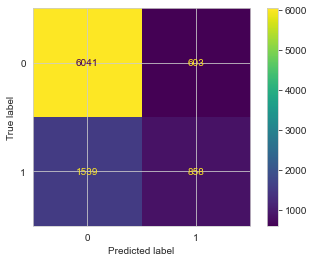

The accuracy of the AdaBoost Model is 0.87
The Kappa Score of the AdaBoost Model is: 0.64
The confusion matrix of the AdaBoost Model:


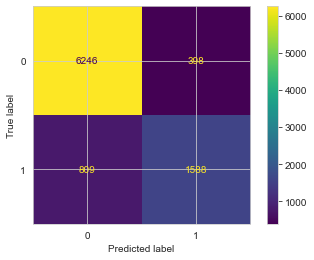

The accuracy of the Random Forest Model is 0.85
The Kappa Score of the Random Forest Model is: 0.60
The confusion matrix of the Random Forest Model:


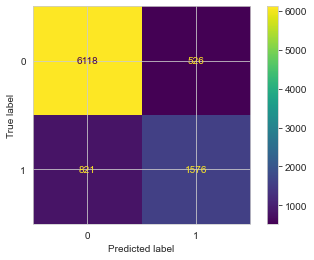

In [124]:
X_train8, X_test8, y_train8, y_test8 = train_test_split(X_tl, y_tl, test_size = 0.3, random_state = 100)

#1. Naive Bayes Classifier.

gnb = GaussianNB()    
gnb_model8=gnb.fit(X_train8, y_train8)
gnb_pred8=gnb_model8.predict(X_test8)
gnb_score8 = round(gnb.score(X_test8,y_test8), 2)

print('The accuracy of the Gausian Naive Bayes Classifier is', gnb_score8)

print("The Kappa Score of Naive Bayes Classifier is: %4.2f" % (cohen_kappa_score(y_test8, gnb_pred8)))

print('The confusion matrix of Naive Bayes Classifier:')
plot_confusion_matrix(gnb_model8, X_test8, y_test8)
plt.show()

#2. Support Vector Machine

classifier= svm.LinearSVC(random_state = 100)
svc_model8=classifier.fit(X_train8, y_train8)
svc_pred8 = svc_model8.predict(X_test8)
svc_score8 = round(classifier.score(X_test8,y_test8), 2)

print('The accuracy of the Support Vector Machine Classifier is', svc_score8)

print("The Kappa Score of Support Vector Machine Classifier is: %4.2f" % (cohen_kappa_score(y_test8, svc_pred8)))

print('The confusion matrix of Suppport Vector Machine Classifier:')
plot_confusion_matrix(svc_model8, X_test8, y_test8)
plt.show()

#3. Logistic Regression

logreg = LogisticRegression()
logreg_model8=logreg.fit(X_train8, y_train8)
logreg_pred8=logreg_model8.predict(X_test8)
score_logreg8 = round(logreg.score(X_test8,y_test8), 2)

print('The accuracy of Logistic Regression is', score_logreg8)

print("The Kappa Score of Logistic Regression is: %4.2f" % (cohen_kappa_score(y_test8, logreg_pred8)))

print('The confusion matrix of Logistic Regression:')
plot_confusion_matrix(logreg_model8, X_test8, y_test8)
plt.show()

#4. K-Nearest Neighbors

knn = KNeighborsClassifier()
knn_model8=knn.fit(X_train8, y_train8)
knn_pred8=knn_model8.predict(X_test8)
score_knn8 = round(knn.score(X_test8,y_test8), 2)
print('The accuracy of the KNN Model is',score_knn8)

print("The Kappa Score of KNN Model is: %4.2f" % (cohen_kappa_score(y_test8, knn_pred8)))

print('The confusion matrix of KNN Model:')
plot_confusion_matrix(knn_model8, X_test8, y_test8)
plt.show()

#5. AdaBoost

adac = AdaBoostClassifier()
adac_model8=adac.fit(X_train8, y_train8)
adac_pred8= adac_model8.predict(X_test8)
adac_score8 =round(adac.score(X_test8,y_test8),2)
print('The accuracy of the AdaBoost Model is',adac_score8)
print("The Kappa Score of the AdaBoost Model is: %4.2f" % (cohen_kappa_score(y_test8, adac_pred8)))

print('The confusion matrix of the AdaBoost Model:')
plot_confusion_matrix(adac_model8, X_test8, y_test8)
plt.show()

#6. Random forest

rfc = RandomForestClassifier()
rfc_model8=rfc.fit(X_train8, y_train8)
rfc_pred8=rfc_model8.predict(X_test8)
rfc_score8 = round(rfc.score(X_test8,y_test8), 2)
print('The accuracy of the Random Forest Model is',rfc_score8)
print("The Kappa Score of the Random Forest Model is: %4.2f" % (cohen_kappa_score(y_test8, rfc_pred8)))

print('The confusion matrix of the Random Forest Model:')
plot_confusion_matrix(rfc_model8, X_test8, y_test8)
plt.show()


gnb8_kappa = round(cohen_kappa_score(y_test8, gnb_pred8), 2)
svc8_kappa= round(cohen_kappa_score(y_test8, svc_pred8), 2)
logreg8_kappa= round(cohen_kappa_score(y_test8, logreg_pred8), 2)
knn8_kappa= round(cohen_kappa_score(y_test8, knn_pred8), 2)
adac8_kappa= round(cohen_kappa_score(y_test8, adac_pred8), 2)
rfc8_kappa= round(cohen_kappa_score(y_test8, rfc_pred8), 2)

# Model 9 - scalling + oversampling + dealing with '?'

In [125]:
df9 = df5.copy()

In [126]:
df9

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [127]:
categorical9 = df9.select_dtypes('object')
numerical9 =df9.select_dtypes('int64')

In [128]:
y9= numerical9['income']
numerical9 = numerical9.drop(['income'], axis=1)

In [129]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(numerical9)
x_standardized9=pd.DataFrame(transformer.transform(numerical9),columns = numerical9.columns)

In [130]:
x_standardized9

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [131]:
categorical9=pd.get_dummies(categorical9)

In [132]:
categorical9.reset_index()

,index,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,

In [133]:
df9a= pd.concat([categorical9, x_standardized9], axis=1)

In [134]:
df9a

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [135]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_sm9, y_sm9 = smote.fit_sample(df9a, y9)
pd.DataFrame(y_sm9).value_counts()

income
1         24720
0         24720
dtype: int64

In [137]:
#df9b= pd.concat([X_sm, y_sm9], axis=1)

In [138]:
#df9b.to_csv(r'C:\Users\zdepptana\iron_hack\Week9\smote_data.csv', index = False)

The accuracy of the Gausian Naive Bayes Classifier is 0.71
The Kappa Score of Naive Bayes Classifier is: 0.42
The confusion matrix of Naive Bayes Classifier:


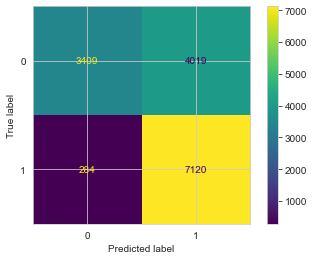

The accuracy of the Support Vector Machine Classifier is 0.86
The Kappa Score of Support Vector Machine Classifier is: 0.72
The confusion matrix of Suppport Vector Machine Classifier:


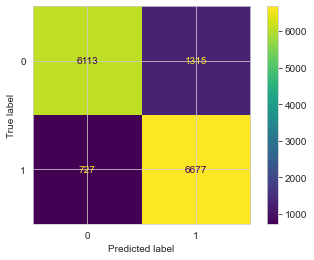

The accuracy of Logistic Regression is 0.86
The Kappa Score of Logistic Regression is: 0.72
The confusion matrix of Logistic Regression:


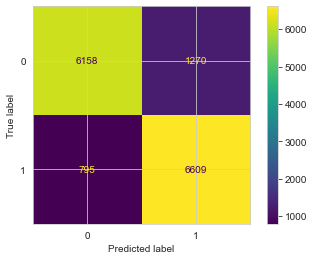

The accuracy of the KNN Model is 0.86
The Kappa Score of KNN Model is: 0.72
The confusion matrix of KNN Model:


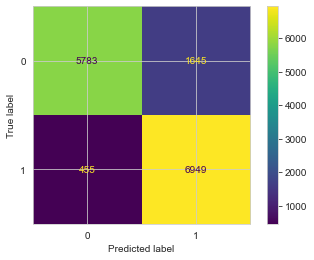

The accuracy of the AdaBoost Model is 0.85
The Kappa Score of the AdaBoost Model is: 0.69
The confusion matrix of the AdaBoost Model:


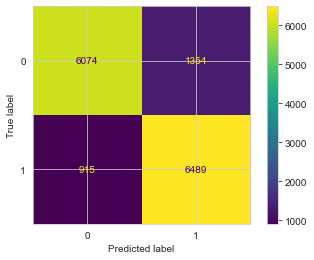

The accuracy of the Random Forest Model is 0.89
The Kappa Score of the Random Forest Model is: 0.78
The confusion matrix of the Random Forest Model:


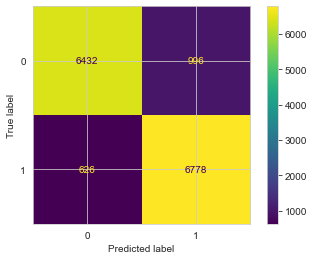

In [139]:
X_train9, X_test9, y_train9, y_test9 = train_test_split(X_sm9, y_sm9, test_size = 0.3, random_state = 100)

#1. Naive Bayes Classifier.

gnb = GaussianNB()    
gnb_model9=gnb.fit(X_train9, y_train9)
gnb_pred9=gnb_model9.predict(X_test9)
gnb_score9 = round(gnb.score(X_test9,y_test9), 2)

print('The accuracy of the Gausian Naive Bayes Classifier is', gnb_score9)

print("The Kappa Score of Naive Bayes Classifier is: %4.2f" % (cohen_kappa_score(y_test9, gnb_pred9)))

print('The confusion matrix of Naive Bayes Classifier:')
plot_confusion_matrix(gnb_model9, X_test9, y_test9)
plt.show()

#2. Support Vector Machine

classifier= svm.LinearSVC(random_state = 100)
svc_model9=classifier.fit(X_train9, y_train9)
svc_pred9 = svc_model9.predict(X_test9)
svc_score9 = round(classifier.score(X_test9,y_test9), 2)

print('The accuracy of the Support Vector Machine Classifier is', svc_score9)

print("The Kappa Score of Support Vector Machine Classifier is: %4.2f" % (cohen_kappa_score(y_test9, svc_pred9)))

print('The confusion matrix of Suppport Vector Machine Classifier:')
plot_confusion_matrix(svc_model9, X_test9, y_test9)
plt.show()

#3. Logistic Regression

logreg = LogisticRegression()
logreg_model9=logreg.fit(X_train9, y_train9)
logreg_pred9=logreg_model9.predict(X_test9)
score_logreg9 = round(logreg.score(X_test9,y_test9), 2)

print('The accuracy of Logistic Regression is', score_logreg9)

print("The Kappa Score of Logistic Regression is: %4.2f" % (cohen_kappa_score(y_test9, logreg_pred9)))

print('The confusion matrix of Logistic Regression:')
plot_confusion_matrix(logreg_model9, X_test9, y_test9)
plt.show()

#4. K-Nearest Neighbors

knn = KNeighborsClassifier()
knn_model9=knn.fit(X_train9, y_train9)
knn_pred9=knn_model9.predict(X_test9)
score_knn9 = round(knn.score(X_test9,y_test9), 2)
print('The accuracy of the KNN Model is',score_knn9)

print("The Kappa Score of KNN Model is: %4.2f" % (cohen_kappa_score(y_test9, knn_pred9)))

print('The confusion matrix of KNN Model:')
plot_confusion_matrix(knn_model9, X_test9, y_test9)
plt.show()

#5. AdaBoost

adac = AdaBoostClassifier()
adac_model9=adac.fit(X_train9, y_train9)
adac_pred9= adac_model9.predict(X_test9)
adac_score9 =round(adac.score(X_test9,y_test9),2)
print('The accuracy of the AdaBoost Model is',adac_score9)
print("The Kappa Score of the AdaBoost Model is: %4.2f" % (cohen_kappa_score(y_test9, adac_pred9)))

print('The confusion matrix of the AdaBoost Model:')
plot_confusion_matrix(adac_model9, X_test9, y_test9)
plt.show()

#6. Random forest

rfc = RandomForestClassifier()
rfc_model9=rfc.fit(X_train9, y_train9)
rfc_pred9=rfc_model9.predict(X_test9)
rfc_score9 = round(rfc.score(X_test9,y_test9), 2)
print('The accuracy of the Random Forest Model is',rfc_score9)
print("The Kappa Score of the Random Forest Model is: %4.2f" % (cohen_kappa_score(y_test9, rfc_pred9)))

print('The confusion matrix of the Random Forest Model:')
plot_confusion_matrix(rfc_model9, X_test9, y_test9)
plt.show()

gnb9_kappa = round(cohen_kappa_score(y_test9, gnb_pred9), 2)
svc9_kappa= round(cohen_kappa_score(y_test9, svc_pred9), 2)
logreg9_kappa= round(cohen_kappa_score(y_test9, logreg_pred9), 2)
knn9_kappa= round(cohen_kappa_score(y_test9, knn_pred9), 2)
adac9_kappa= round(cohen_kappa_score(y_test9, adac_pred9), 2)
rfc9_kappa= round(cohen_kappa_score(y_test9, rfc_pred9), 2)


# Model 10 Mix - SMOTE, '?', grouping education and scaling

In [140]:
df10 = df5.copy()

In [141]:
df10['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [142]:
education = {' Bachelors': 'Bachelor', 
             ' HS-grad' : 'Highschool', 
             ' 11th': 'Primary School', 
             ' Masters': 'Master',
             ' 9th' : 'Primary School', 
             ' Some-college' : 'Some-college',
             ' Assoc-acdm' : 'Assoc-acdm',
             ' Assoc-voc' : 'Assoc-voc',
             ' 7th-8th': 'Primary School',
             ' Doctorate' : 'Doctorate',
             ' Prof-school' : 'Prof-school',
             ' 5th-6th': 'Primary School',
             ' 10th': 'Primary School',
             ' 1st-4th': 'Primary School',
             ' Preschool': 'Primary School',
             ' 12th': 'Primary School'}
df10['education']=df10['education'].replace(education)


In [143]:
categorical10 = df10.select_dtypes('object')
numerical10 =df10.select_dtypes('int64')

In [144]:
y10= numerical10['income']
numerical10 = numerical10.drop(['income'], axis=1)

In [145]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(numerical10)
x_standardized10=pd.DataFrame(transformer.transform(numerical10),columns = numerical10.columns)

In [146]:
x_standardized10

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [147]:
categorical10=pd.get_dummies(categorical10)

In [148]:
categorical10.reset_index()

,index,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_Assoc-acdm,education_Assoc-voc,education_Bachelor,education_Doctorate,education_Highschool,education_Master,education_Primary School,education_Prof-school,education_Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,32557,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,32558,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0

In [149]:
df10a= pd.concat([categorical10, x_standardized10], axis=1)

In [150]:
df10a

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_Assoc-acdm,education_Assoc-voc,education_Bachelor,education_Doctorate,education_Highschool,education_Master,education_Primary School,education_Prof-school,education_Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [151]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_sm10, y_sm10 = smote.fit_sample(df10a, y10)
pd.DataFrame(y_sm10).value_counts()

income
1         24720
0         24720
dtype: int64

The accuracy of the Gausian Naive Bayes Classifier is 0.69
The Kappa Score of Naive Bayes Classifier is: 0.39
The confusion matrix of Naive Bayes Classifier:


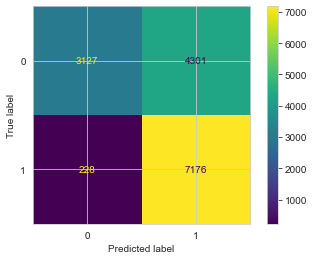

The accuracy of the Support Vector Machine Classifier is 0.86
The Kappa Score of Support Vector Machine Classifier is: 0.72
The confusion matrix of Suppport Vector Machine Classifier:


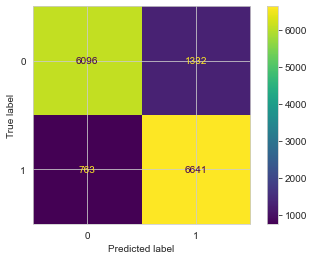

The accuracy of Logistic Regression is 0.86
The Kappa Score of Logistic Regression is: 0.71
The confusion matrix of Logistic Regression:


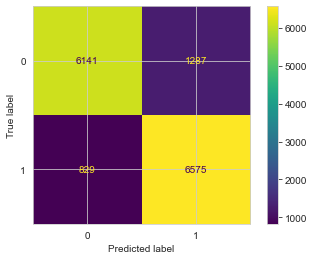

The accuracy of the KNN Model is 0.85
The Kappa Score of KNN Model is: 0.71
The confusion matrix of KNN Model:


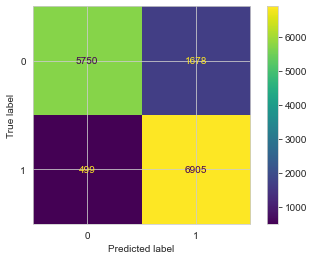

The accuracy of the AdaBoost Model is 0.85
The Kappa Score of the AdaBoost Model is: 0.69
The confusion matrix of the AdaBoost Model:


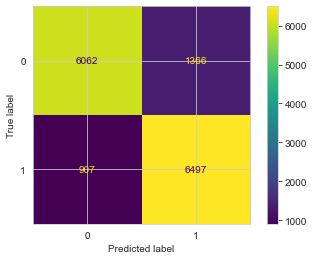

The accuracy of the Random Forest Model is 0.89
The Kappa Score of the Random Forest Model is: 0.78
The confusion matrix of the Random Forest Model:


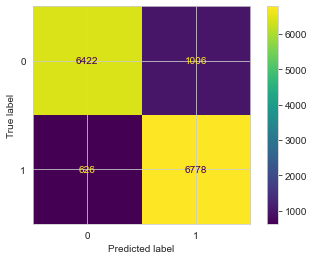

In [152]:
X_train10, X_test10, y_train10, y_test10 = train_test_split(X_sm10, y_sm10, test_size = 0.3, random_state = 100)

#1. Naive Bayes Classifier.

gnb = GaussianNB()    
gnb_model10=gnb.fit(X_train10, y_train10)
gnb_pred10=gnb_model10.predict(X_test10)
gnb_score10 = round(gnb.score(X_test10,y_test10), 2)

print('The accuracy of the Gausian Naive Bayes Classifier is', gnb_score10)

print("The Kappa Score of Naive Bayes Classifier is: %4.2f" % (cohen_kappa_score(y_test10, gnb_pred10)))

print('The confusion matrix of Naive Bayes Classifier:')
plot_confusion_matrix(gnb_model10, X_test10, y_test10)
plt.show()

#2. Support Vector Machine

classifier= svm.LinearSVC(random_state = 100)
svc_model10=classifier.fit(X_train10, y_train10)
svc_pred10 = svc_model10.predict(X_test10)
svc_score10 = round(classifier.score(X_test10,y_test10), 2)

print('The accuracy of the Support Vector Machine Classifier is', svc_score10)

print("The Kappa Score of Support Vector Machine Classifier is: %4.2f" % (cohen_kappa_score(y_test10, svc_pred10)))

print('The confusion matrix of Suppport Vector Machine Classifier:')
plot_confusion_matrix(svc_model10, X_test10, y_test10)
plt.show()

#3. Logistic Regression

logreg = LogisticRegression()
logreg_model10=logreg.fit(X_train10, y_train10)
logreg_pred10=logreg_model10.predict(X_test10)
score_logreg10 = round(logreg.score(X_test10,y_test10), 2)

print('The accuracy of Logistic Regression is', score_logreg10)

print("The Kappa Score of Logistic Regression is: %4.2f" % (cohen_kappa_score(y_test10, logreg_pred10)))

print('The confusion matrix of Logistic Regression:')
plot_confusion_matrix(logreg_model10, X_test10, y_test10)
plt.show()

#4. K-Nearest Neighbors

knn = KNeighborsClassifier()
knn_model10=knn.fit(X_train10, y_train10)
knn_pred10=knn_model10.predict(X_test10)
score_knn10 = round(knn.score(X_test10,y_test10), 2)
print('The accuracy of the KNN Model is',score_knn10)

print("The Kappa Score of KNN Model is: %4.2f" % (cohen_kappa_score(y_test10, knn_pred10)))

print('The confusion matrix of KNN Model:')
plot_confusion_matrix(knn_model10, X_test10, y_test10)
plt.show()

#5. AdaBoost

adac = AdaBoostClassifier()
adac_model10=adac.fit(X_train10, y_train10)
adac_pred10= adac_model10.predict(X_test10)
adac_score10 =round(adac.score(X_test10,y_test10),2)
print('The accuracy of the AdaBoost Model is',adac_score10)
print("The Kappa Score of the AdaBoost Model is: %4.2f" % (cohen_kappa_score(y_test10, adac_pred10)))

print('The confusion matrix of the AdaBoost Model:')
plot_confusion_matrix(adac_model10, X_test10, y_test10)
plt.show()

#6. Random forest

rfc = RandomForestClassifier()
rfc_model10=rfc.fit(X_train10, y_train10)
rfc_pred10=rfc_model10.predict(X_test10)
rfc_score10 = round(rfc.score(X_test10,y_test10), 2)
print('The accuracy of the Random Forest Model is',rfc_score10)
print("The Kappa Score of the Random Forest Model is: %4.2f" % (cohen_kappa_score(y_test10, rfc_pred10)))

print('The confusion matrix of the Random Forest Model:')
plot_confusion_matrix(rfc_model10, X_test10, y_test10)
plt.show()

gnb10_kappa = round(cohen_kappa_score(y_test10, gnb_pred10), 2)
svc10_kappa= round(cohen_kappa_score(y_test10, svc_pred10), 2)
logreg10_kappa= round(cohen_kappa_score(y_test10, logreg_pred10), 2)
knn10_kappa= round(cohen_kappa_score(y_test10, knn_pred10), 2)
adac10_kappa= round(cohen_kappa_score(y_test10, adac_pred10), 2)
rfc10_kappa= round(cohen_kappa_score(y_test10, rfc_pred10), 2)


In [153]:
#Metrics DONE


#Accuracy Score 
#cohen_kappa_score
#Confusion Matrix
#precission,recall


#sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

#log loss 
#Area Under the Curve (AUC)
#Receiver Operating Characteristic (ROC) Curves



#Top 6 Classification Algorithms in Machine Learning

#Naive Bayes Classifier.
#Support Vector Machine
#Logistic Regression.
#K-Nearest Neighbors.
#AdaBoost
#Random Forest.


#Metrics

#Accuracy Score 
#cohen_kappa_score
#Confusion Matrix

In [154]:
# TUESDAY
        
    # MAYBE dropping not needed columns NOT NEEDED
    #log transforming high skewed columns  DONE
    # Transforming education to less values (1-12 grade is primary school) DONE
    

In [155]:
# WEDNESDAYS
    # dealing with ?  DONE
    # Oversampling SMOTE
    # Undersampling TOMEK

# COMPARING MODELS

In [156]:
Model1_accuracy = pd.DataFrame (columns = ['Number','Naive Bayes Classifier','Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors', 'AdaBoost', 'Random Forest'])   
Model2_accuracy = pd.DataFrame (columns = ['Number','Naive Bayes Classifier','Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors', 'AdaBoost', 'Random Forest'])   
Model3_accuracy = pd.DataFrame (columns = ['Number','Naive Bayes Classifier','Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors', 'AdaBoost', 'Random Forest'])   
Model4_accuracy = pd.DataFrame (columns = ['Number','Naive Bayes Classifier','Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors', 'AdaBoost', 'Random Forest'])   
Model5_accuracy = pd.DataFrame (columns = ['Number','Naive Bayes Classifier','Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors', 'AdaBoost', 'Random Forest'])   
Model6_accuracy = pd.DataFrame (columns = ['Number','Naive Bayes Classifier','Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors', 'AdaBoost', 'Random Forest'])   
Model7_accuracy = pd.DataFrame (columns = ['Number','Naive Bayes Classifier','Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors', 'AdaBoost', 'Random Forest'])   
Model8_accuracy = pd.DataFrame (columns = ['Number','Naive Bayes Classifier','Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors', 'AdaBoost', 'Random Forest'])   
Model9_accuracy = pd.DataFrame (columns = ['Number','Naive Bayes Classifier','Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors', 'AdaBoost', 'Random Forest'])   
Model10_accuracy = pd.DataFrame (columns = ['Number','Naive Bayes Classifier','Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors', 'AdaBoost', 'Random Forest'])   





In [157]:
Model1_kappa = pd.DataFrame (columns = ['Number','Naive Bayes Classifier','Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors', 'AdaBoost', 'Random Forest'])   
Model2_kappa = pd.DataFrame (columns = ['Number','Naive Bayes Classifier','Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors', 'AdaBoost', 'Random Forest'])   
Model3_kappa = pd.DataFrame (columns = ['Number','Naive Bayes Classifier','Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors', 'AdaBoost', 'Random Forest'])   
Model4_kappa = pd.DataFrame (columns = ['Number','Naive Bayes Classifier','Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors', 'AdaBoost', 'Random Forest'])   
Model5_kappa = pd.DataFrame (columns = ['Number','Naive Bayes Classifier','Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors', 'AdaBoost', 'Random Forest'])   
Model6_kappa = pd.DataFrame (columns = ['Number','Naive Bayes Classifier','Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors', 'AdaBoost', 'Random Forest'])   
Model7_kappa = pd.DataFrame (columns = ['Number','Naive Bayes Classifier','Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors', 'AdaBoost', 'Random Forest'])   
Model8_kappa = pd.DataFrame (columns = ['Number','Naive Bayes Classifier','Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors', 'AdaBoost', 'Random Forest'])   
Model9_kappa = pd.DataFrame (columns = ['Number','Naive Bayes Classifier','Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors', 'AdaBoost', 'Random Forest'])   
Model10_kappa = pd.DataFrame (columns = ['Number','Naive Bayes Classifier','Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors', 'AdaBoost', 'Random Forest'])   


In [158]:
Model1_accuracy = Model1_accuracy.append({'Number': 'Model_1_accuracy','Naive Bayes Classifier': gnb_score1 ,'Support Vector Machine':
svc_score1, 'Logistic Regression': score_logreg1 , 'K-Nearest Neighbors' : score_knn1, 'AdaBoost': adac_score1, 'Random Forest': rfc_score1 }, ignore_index=True)
Model1_kappa = Model1_kappa.append({'Number': 'Model_1_kappa','Naive Bayes Classifier': gnb1_kappa,'Support Vector Machine':
svc1_kappa, 'Logistic Regression': logreg1_kappa, 'K-Nearest Neighbors' : knn1_kappa, 'AdaBoost': adac1_kappa, 'Random Forest': rfc1_kappa }, ignore_index=True)


Model2_accuracy = Model2_accuracy.append({'Number': 'Model_2_accuracy','Naive Bayes Classifier': gnb_score2 ,'Support Vector Machine':
svc_score2, 'Logistic Regression': score_logreg2, 'K-Nearest Neighbors' : score_knn2, 'AdaBoost': adac_score2, 'Random Forest': rfc_score2 }, ignore_index=True)
Model2_kappa = Model2_kappa.append({'Number': 'Model_2_kappa','Naive Bayes Classifier': gnb2_kappa,'Support Vector Machine':
svc2_kappa, 'Logistic Regression': logreg2_kappa, 'K-Nearest Neighbors' : knn2_kappa, 'AdaBoost': adac2_kappa, 'Random Forest': rfc2_kappa }, ignore_index=True)


Model3_accuracy = Model3_accuracy.append({'Number': 'Model_3_accuracy','Naive Bayes Classifier': gnb_score3 ,'Support Vector Machine':
svc_score3, 'Logistic Regression': score_logreg3, 'K-Nearest Neighbors' : score_knn3, 'AdaBoost': adac_score3, 'Random Forest': rfc_score3 }, ignore_index=True)
Model3_kappa = Model3_kappa.append({'Number': 'Model_3_kappa','Naive Bayes Classifier': gnb3_kappa,'Support Vector Machine':
svc3_kappa, 'Logistic Regression': logreg3_kappa, 'K-Nearest Neighbors' : knn3_kappa, 'AdaBoost': adac3_kappa, 'Random Forest': rfc3_kappa }, ignore_index=True)


Model4_accuracy = Model4_accuracy.append({'Number': 'Model_4_accuracy','Naive Bayes Classifier': gnb_score4 ,'Support Vector Machine':
svc_score4, 'Logistic Regression': score_logreg4, 'K-Nearest Neighbors' : score_knn4, 'AdaBoost': adac_score4, 'Random Forest': rfc_score4 }, ignore_index=True)
Model4_kappa = Model4_kappa.append({'Number': 'Model_4_kappa','Naive Bayes Classifier': gnb4_kappa,'Support Vector Machine':
svc4_kappa, 'Logistic Regression': logreg4_kappa, 'K-Nearest Neighbors' : knn4_kappa, 'AdaBoost': adac4_kappa, 'Random Forest': rfc4_kappa }, ignore_index=True)


Model5_accuracy = Model5_accuracy.append({'Number': 'Model_5_accuracy','Naive Bayes Classifier': gnb_score5 ,'Support Vector Machine':
svc_score5, 'Logistic Regression': score_logreg5, 'K-Nearest Neighbors' : score_knn5, 'AdaBoost': adac_score5, 'Random Forest': rfc_score5 }, ignore_index=True)
Model5_kappa = Model5_kappa.append({'Number': 'Model_5_kappa','Naive Bayes Classifier': gnb5_kappa,'Support Vector Machine':
svc5_kappa, 'Logistic Regression': logreg5_kappa, 'K-Nearest Neighbors' : knn5_kappa, 'AdaBoost': adac5_kappa, 'Random Forest': rfc5_kappa }, ignore_index=True)


Model6_accuracy = Model6_accuracy.append({'Number': 'Model_6_accuracy','Naive Bayes Classifier': gnb_score6 ,'Support Vector Machine':
svc_score6, 'Logistic Regression': score_logreg6, 'K-Nearest Neighbors' : score_knn6, 'AdaBoost': adac_score6, 'Random Forest': rfc_score6 }, ignore_index=True)
Model6_kappa = Model6_kappa.append({'Number': 'Model_6_kappa','Naive Bayes Classifier': gnb6_kappa,'Support Vector Machine':
svc6_kappa, 'Logistic Regression': logreg6_kappa, 'K-Nearest Neighbors' : knn6_kappa, 'AdaBoost': adac6_kappa, 'Random Forest': rfc6_kappa }, ignore_index=True)


Model7_accuracy = Model7_accuracy.append({'Number': 'Model_7_accuracy','Naive Bayes Classifier': gnb_score7 ,'Support Vector Machine':
svc_score7, 'Logistic Regression': score_logreg7, 'K-Nearest Neighbors' : score_knn7, 'AdaBoost': adac_score7, 'Random Forest': rfc_score7 }, ignore_index=True)
Model7_kappa = Model7_kappa.append({'Number': 'Model_7_kappa','Naive Bayes Classifier': gnb7_kappa,'Support Vector Machine':
svc7_kappa, 'Logistic Regression': logreg7_kappa, 'K-Nearest Neighbors' : knn7_kappa, 'AdaBoost': adac7_kappa, 'Random Forest': rfc7_kappa }, ignore_index=True)


Model8_accuracy= Model8_accuracy.append({'Number': 'Model_8_accuracy','Naive Bayes Classifier': gnb_score8 ,'Support Vector Machine':
svc_score8, 'Logistic Regression': score_logreg8, 'K-Nearest Neighbors' : score_knn8, 'AdaBoost': adac_score8, 'Random Forest': rfc_score8 }, ignore_index=True)
Model8_kappa = Model8_kappa.append({'Number': 'Model_8_kappa','Naive Bayes Classifier': gnb8_kappa,'Support Vector Machine':
svc8_kappa, 'Logistic Regression': logreg8_kappa, 'K-Nearest Neighbors' : knn8_kappa, 'AdaBoost': adac8_kappa, 'Random Forest': rfc8_kappa }, ignore_index=True)


Model9_accuracy= Model9_accuracy.append({'Number': 'Model_9_accuracy','Naive Bayes Classifier': gnb_score9 ,'Support Vector Machine':
svc_score9, 'Logistic Regression': score_logreg9, 'K-Nearest Neighbors' : score_knn9, 'AdaBoost': adac_score9, 'Random Forest': rfc_score9 }, ignore_index=True)
Model9_kappa = Model9_kappa.append({'Number': 'Model_9_kappa','Naive Bayes Classifier': gnb9_kappa,'Support Vector Machine':
svc9_kappa, 'Logistic Regression': logreg9_kappa, 'K-Nearest Neighbors' : knn9_kappa, 'AdaBoost': adac9_kappa, 'Random Forest': rfc9_kappa }, ignore_index=True)


Model10_accuracy= Model10_accuracy.append({'Number': 'Model_10_accuracy','Naive Bayes Classifier': gnb_score10 ,'Support Vector Machine':
svc_score10, 'Logistic Regression': score_logreg10, 'K-Nearest Neighbors' : score_knn10, 'AdaBoost': adac_score10, 'Random Forest': rfc_score10 }, ignore_index=True)
Model10_kappa = Model10_kappa.append({'Number': 'Model_10_kappa','Naive Bayes Classifier': gnb10_kappa,'Support Vector Machine':
svc10_kappa, 'Logistic Regression': logreg10_kappa, 'K-Nearest Neighbors' : knn10_kappa, 'AdaBoost': adac10_kappa, 'Random Forest': rfc10_kappa }, ignore_index=True)













In [159]:
models = [Model1_accuracy, Model1_kappa, Model2_accuracy, Model2_kappa, Model3_accuracy, Model3_kappa, Model4_accuracy, Model4_kappa,  Model5_accuracy, Model5_kappa, Model6_accuracy, Model6_kappa, Model7_accuracy, Model7_kappa, Model8_accuracy, Model8_kappa, Model9_accuracy, Model9_kappa, Model10_accuracy, Model10_kappa]

In [160]:
Comparing_models = pd.concat(models)

In [161]:
Comparing_models 

,Number,Naive Bayes Classifier,Support Vector Machine,Logistic Regression,K-Nearest Neighbors,AdaBoost,Random Forest
0,Model_1_accuracy,0.80,0.78,0.80,0.78,0.86,0.85
0,Model_1_kappa,0.33,0.13,0.31,0.29,0.60,0.58
0,Model_2_accuracy,0.80,0.76,0.77,0.73,0.86,0.85
0,Model_2_kappa,0.30,0.00,0.15,0.13,0.60,0.58
0,Model_3_accuracy,0.80,0.77,0.80,0.78,0.86,0.86
0,Model_3_kappa,0.26,0.06,0.25,0.26,0.60,0.58
0,Model_4_accuracy,0.52,0.85,0.85,0.83,0.86,0.85
0,Model_4_kappa,0.20,0.57,0.57,0.53,0.60,0.58
0,Model_5_accuracy,0.80,0.78,0.80,0.78,0.86,0.85
0,Model_5_kappa,0.26,0.13,0.31,0.29,0.59,0.58


In [162]:
#Raw data & Best Model

In [163]:
models2= [Model1_accuracy, Model1_kappa, Model9_accuracy, Model9_kappa]

In [164]:
Best = pd.concat (models2)

In [165]:
Best

,Number,Naive Bayes Classifier,Support Vector Machine,Logistic Regression,K-Nearest Neighbors,AdaBoost,Random Forest
0,Model_1_accuracy,0.80,0.78,0.80,0.78,0.86,0.85
0,Model_1_kappa,0.33,0.13,0.31,0.29,0.60,0.58
0,Model_9_accuracy,0.71,0.86,0.86,0.86,0.85,0.89
0,Model_9_kappa,0.42,0.72,0.72,0.72,0.69,0.78


The confusion matrix of Naive Bayes Classifier:


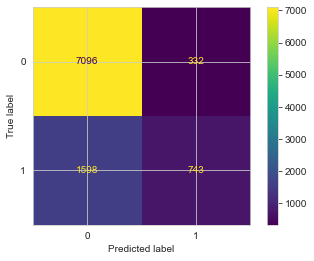

The confusion matrix of Suppport Vector Machine Classifier:


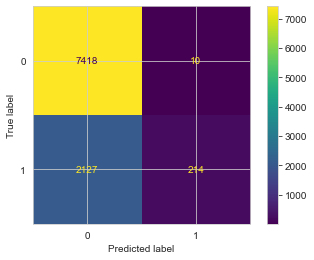

The confusion matrix of Logistic Regression:


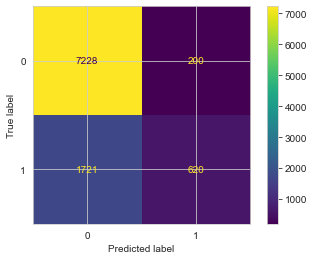

The confusion matrix of KNN Model:


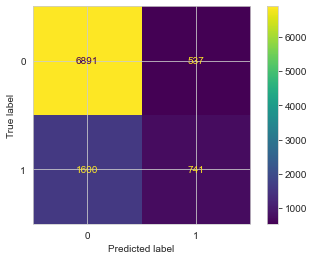

The confusion matrix of the AdaBoost Model:


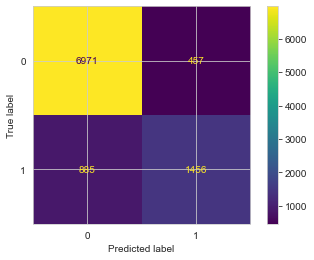

The confusion matrix of the Random Forest Model:


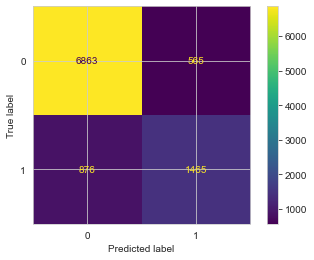

In [166]:
# RAW DATA
#1. Naive Bayes Classifier.
print('The confusion matrix of Naive Bayes Classifier:')
plot_confusion_matrix(gnb_model1, X_test1, y_test1)
plt.show()
#2. Support Vector Machine
print('The confusion matrix of Suppport Vector Machine Classifier:')
plot_confusion_matrix(svc_model1, X_test1, y_test1)
plt.show()
#3. Logistic Regression
print('The confusion matrix of Logistic Regression:')
plot_confusion_matrix(logreg_model1, X_test1, y_test1)
plt.show()
#4. K-Nearest Neighbors
print('The confusion matrix of KNN Model:')
plot_confusion_matrix(knn_model1, X_test1, y_test1)
plt.show()
#5. AdaBoost
print('The confusion matrix of the AdaBoost Model:')
plot_confusion_matrix(adac_model1, X_test1, y_test1)
plt.show()
#6. Random forest
print('The confusion matrix of the Random Forest Model:')
plot_confusion_matrix(rfc_model1, X_test1, y_test1)
plt.show()

The confusion matrix of Naive Bayes Classifier:


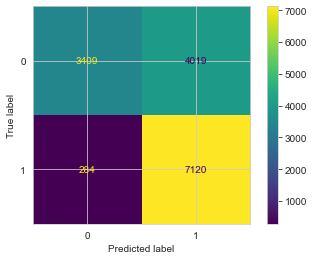

The confusion matrix of Suppport Vector Machine Classifier:


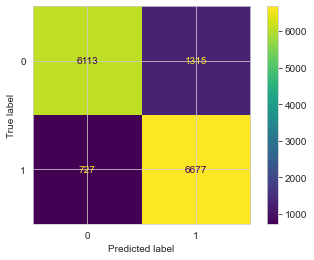

The confusion matrix of Logistic Regression:


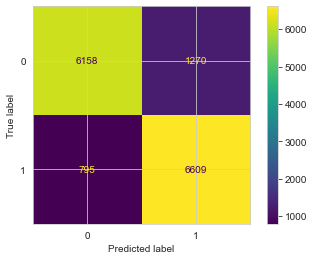

The confusion matrix of KNN Model:


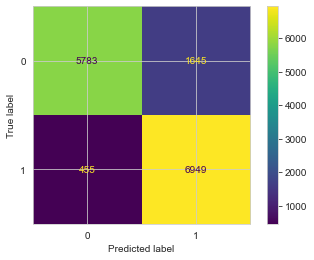

The confusion matrix of the AdaBoost Model:


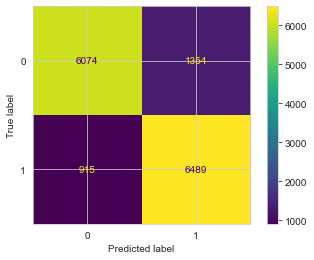

The confusion matrix of the Random Forest Model:


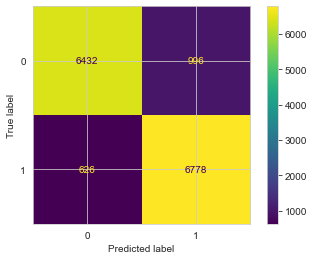

In [167]:
# Best Model
#1. Naive Bayes Classifier.
print('The confusion matrix of Naive Bayes Classifier:')
plot_confusion_matrix(gnb_model9, X_test9, y_test9)
plt.show()
#2. Support Vector Machine
print('The confusion matrix of Suppport Vector Machine Classifier:')
plot_confusion_matrix(svc_model9, X_test9, y_test9)
plt.show()
#3. Logistic Regression
print('The confusion matrix of Logistic Regression:')
plot_confusion_matrix(logreg_model9, X_test9, y_test9)
plt.show()
#4. K-Nearest Neighbors
print('The confusion matrix of KNN Model:')
plot_confusion_matrix(knn_model9, X_test9, y_test9)
plt.show()
#5. AdaBoost
print('The confusion matrix of the AdaBoost Model:')
plot_confusion_matrix(adac_model9, X_test9, y_test9)
plt.show()
#6. Random forest
print('The confusion matrix of the Random Forest Model:')
plot_confusion_matrix(rfc_model9, X_test9, y_test9)
plt.show()

In [168]:
from sklearn.metrics import classification_report

# 1.Random Forest

In [169]:
print(classification_report(y_test9, rfc_pred9))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      7428
           1       0.87      0.92      0.89      7404

    accuracy                           0.89     14832
   macro avg       0.89      0.89      0.89     14832
weighted avg       0.89      0.89      0.89     14832



In [170]:
print(classification_report(y_test1, rfc_pred1))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7428
           1       0.72      0.63      0.67      2341

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769



# 2.Logistic Regression

In [171]:
print(classification_report(y_test9, logreg_pred9))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      7428
           1       0.84      0.89      0.86      7404

    accuracy                           0.86     14832
   macro avg       0.86      0.86      0.86     14832
weighted avg       0.86      0.86      0.86     14832



In [172]:
print(classification_report(y_test1, logreg_pred1))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7428
           1       0.76      0.26      0.39      2341

    accuracy                           0.80      9769
   macro avg       0.78      0.62      0.64      9769
weighted avg       0.80      0.80      0.77      9769



# 3.Suppport Vector Machine

In [173]:
print(classification_report(y_test9, svc_pred9))

              precision    recall  f1-score   support

           0       0.89      0.82      0.86      7428
           1       0.84      0.90      0.87      7404

    accuracy                           0.86     14832
   macro avg       0.86      0.86      0.86     14832
weighted avg       0.86      0.86      0.86     14832



In [174]:
print(classification_report(y_test1, svc_pred1))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      7428
           1       0.96      0.09      0.17      2341

    accuracy                           0.78      9769
   macro avg       0.87      0.55      0.52      9769
weighted avg       0.82      0.78      0.70      9769

